# The Evolution of Canada’s Immigration Between 1980 and 2013

## I. Introduction

### 1. Project Background

This project focuses on analyzing historical immigration trends to Canada from 1980 to 2013. The dataset captures immigration flows from various countries worldwide, with records indicating annual immigration counts from each country. This data enables us to explore how immigration patterns have evolved over the years, allowing for deeper insights into global movements and how different regions have contributed to Canada’s population growth.

The primary purpose of this project is to uncover insights into these immigration trends, providing a detailed understanding of how factors like geography, economic development, and historical events have shaped migration flows. By focusing on continent and region-level patterns, as well as distinctions between developed and developing regions, the analysis will reveal valuable insights into Canada's immigration landscape.

As an African and native of Morocco, I have included an in-depth analysis of African immigration, with a specific focus on North Africa and Morocco, to draw insights and understand the immigration trends from my continent and my home country. This focused exploration will highlight how these regions have influenced Canadian immigration patterns over time, offering a nuanced understanding of the contributions from Africa, North Africa, and Morocco to Canada's diverse population.

### 2. Objective

This analysis aims to answer several **key questions**:

+ **Overall Immigration Trends**

    + **What has been the trajectory of immigration to Canada over the `years`?**
    + **Are there significant peaks or declines, and what could be the possible reasons?**

+ **`Continent` and `Region` Specific Patterns**

    + **How do immigration trends vary across `continents` and `regions`?**
    + **Are there noticeable differences among `regions` within the same `continent`?**

+ **`Developed` vs. `Developing` Regions**

    + **How do immigration trends differ between `developed` and `developing` regions?**
    + **What patterns, if any, can be identified based on economic development?**

+ **Special Focus on `Africa`, `North Africa`, and `Morocco`**

    + **How has immigration from `Africa` contributed to Canadian immigration patterns over time?**
    + **What are the specific trends and influences of `North African` immigration on `Canada`?**
    + **How has immigration from `Morocco` evolved over the years, and what unique insights can be drawn from `Morocco`’s immigration patterns to `Canada`?**

## II. Data Understanding and Preprocessing

### 1. Data Overview

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and data handling
import seaborn as sns  # For data visualization, especially statistical graphics
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualization

In [2]:
# Loading the dataset into a DataFrame
df = pd.read_csv('Canada_info.csv')  # Reading the CSV file containing Canadian information data

# Displaying a random sample of 5 rows to get an overview of the dataset structure and content
df.sample(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
44,Croatia,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,128,102,102,131,92,91,135,112,125,8001
137,Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,...,1405,1263,1235,1267,1013,795,720,779,852,139241
11,Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1153,847,620,540,467,459,278,263,282,19596
181,Ukraine,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,...,2270,1973,2218,1937,2367,3159,2515,2265,2487,51410


In [3]:
def display_basic_info(df: pd.DataFrame):
    """
    Display basic information about a DataFrame, including its dimensions and column types.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to be analyzed.
    """
    # Get the number of rows and columns in the DataFrame
    n_rows = df.shape[0]
    n_columns = df.shape[1]
    
    # Identify numeric and categorical columns
    num_columns = df.select_dtypes(include=['number']).columns  # Numeric columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns  # Categorical columns
    
    # Display the information
    print("\n===== Basic DataFrame Information ======\n")
    print(f"Number of rows: {n_rows}")
    print(f"Number of columns: {n_columns}")
    print(f"Number of numeric columns: {len(num_columns)}")
    print(f"Number of categorical columns: {len(cat_columns)}")
    print("\n========================================\n")

# Display basic info about the dataset
display_basic_info(df)


===== Basic DataFrame Information ======

Number of rows: 195
Number of columns: 39
Number of numeric columns: 35
Number of categorical columns: 4




The dataset spans **34** years, from **1980** to **2013**, and includes immigration data for **195** countries. It contains both `categorical` and `numerical` fields, offering a rich basis for analysis:

+ **`Country`**: The name of each country contributing immigration data.
+ **`Continent`**: The continent each country belongs to (e.g., **Asia**, **Europe**, **Africa**).
+ **`Region`**: A more granular geographic breakdown, such as **Southern Asia** or **Northern Africa**.
+ **`DevName`**: A classification indicating whether the region is **Developed** or **Developing**.
+ **`Annual Data (1980–2013)`**: Immigration numbers recorded annually for each country.
+ **`Total`**: A cumulative column that **sums** immigration counts for each country across **all years** in the dataset.

### 2. Data Cleaning

### 2.1 Handling Missing or Duplicate Values

In [4]:
def display_nan_and_duplicates_info(df: pd.DataFrame):
    """
    Display information about NaN (missing) values and duplicate rows in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to be analyzed.
    """
    # Calculate the total number of NaN values in the DataFrame
    total_nan = df.isna().sum().sum()
    
    # Identify numeric and categorical columns
    num_columns = df.select_dtypes(include=['number']).columns  # Numeric columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns  # Categorical columns
    
    # Calculate the number of NaN values in numeric and categorical columns
    num_nan = df[num_columns].isna().sum().sum()  # NaN values in numeric columns
    cat_nan = df[cat_columns].isna().sum().sum()  # NaN values in categorical columns
    
    # Calculate the number of duplicate rows
    n_duplicates = df.duplicated().sum()
    
    # Display the information
    print("\n===== NaN and Duplicate Information =====\n")
    print(f"Total number of NaN values: {total_nan}")
    print(f"NaN in numeric columns: {num_nan}")
    print(f"NaN in categorical columns: {cat_nan}")
    print(f"Number of duplicate rows: {n_duplicates}")
    print("\n=========================================\n")

# Display NaN and duplicate information about the dataset
display_nan_and_duplicates_info(df)


===== NaN and Duplicate Information =====

Total number of NaN values: 0
NaN in numeric columns: 0
NaN in categorical columns: 0
Number of duplicate rows: 0




+ There are **no missing values** in any column, which means we have a **complete dataset** with **no gaps** that could affect trend analyses.
+ There are **no duplicate rows**, ensuring that each entry is **unique** and properly represents a **distinct country**.  

### 2.2 Ensuring Correct Data Types

In [5]:
def display_column_info(dataframe):
    """
    Display detailed information about each data type present in the DataFrame,
    including the number and names of columns for each data type.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    """
    # Identify data types of each column
    column_types = dataframe.dtypes  # Series containing column names as index and data types as values
    unique_types = set(dataframe.dtypes.astype(str))  # Unique set of data types in the DataFrame
    
    # Display header
    print("===== DataFrame Column Information =====\n")
    
    # Iterate over each unique data type
    for data_type in unique_types:
        # Select columns corresponding to the current data type
        type_columns = column_types[column_types == data_type].index.tolist()  # List of columns of this data type
        num_columns = len(type_columns)  # Number of columns of this data type
        
        # Display data type and the number of columns it has
        print(f"=== Total {data_type} columns: {num_columns} ===\n")
        
        # Display the names of columns of this data type
        print(f"{num_columns} column(s) of type '{data_type}':\n")
        print(" ,  ".join(type_columns) + " ,\n")
    
    print("=========================================")

# Display column information of the dataset
display_column_info(df)

===== DataFrame Column Information =====

=== Total int64 columns: 35 ===

35 column(s) of type 'int64':

1980 ,  1981 ,  1982 ,  1983 ,  1984 ,  1985 ,  1986 ,  1987 ,  1988 ,  1989 ,  1990 ,  1991 ,  1992 ,  1993 ,  1994 ,  1995 ,  1996 ,  1997 ,  1998 ,  1999 ,  2000 ,  2001 ,  2002 ,  2003 ,  2004 ,  2005 ,  2006 ,  2007 ,  2008 ,  2009 ,  2010 ,  2011 ,  2012 ,  2013 ,  Total ,

=== Total object columns: 4 ===

4 column(s) of type 'object':

Country ,  Continent ,  Region ,  DevName ,



+ Originally, **`Country`**, **`Continent`**, **`Region`**, and **`DevName`** were set as object (**`string`**) types, while the **`year`** columns (**35** columns) and **`Total`** were **`int64`**.

In [6]:
# Defining a list of columns that should be treated as categorical
categorical_columns = ["Country", "Continent", "Region", "DevName"]

# Converting specified columns to the categorical data type to optimize memory usage and improve processing speed
df[categorical_columns] = df[categorical_columns].astype("category")

+ We converted **`Country`**, **`Continent`**, **`Region`**, and **`DevName`** to **`categorical`** types, which is more efficient for analysis. The **`year`** columns (**35** columns) and **`Total`** remain as **`int64`**, suitable for numerical analysis.

In [7]:
# Calling the display_column_info function to show detailed information about each data type in the DataFrame
display_column_info(df)

===== DataFrame Column Information =====

=== Total int64 columns: 35 ===

35 column(s) of type 'int64':

1980 ,  1981 ,  1982 ,  1983 ,  1984 ,  1985 ,  1986 ,  1987 ,  1988 ,  1989 ,  1990 ,  1991 ,  1992 ,  1993 ,  1994 ,  1995 ,  1996 ,  1997 ,  1998 ,  1999 ,  2000 ,  2001 ,  2002 ,  2003 ,  2004 ,  2005 ,  2006 ,  2007 ,  2008 ,  2009 ,  2010 ,  2011 ,  2012 ,  2013 ,  Total ,

=== Total category columns: 4 ===

4 column(s) of type 'category':

Country ,  Continent ,  Region ,  DevName ,



### 3. Initial Explorations

We will analyze both **`numerical`** and **`categorical`** columns to gain a foundational understanding of the dataset.

### 3.1 Summary Statistics for Numerical Columns

For **`numerical`** columns, we'll examine key **`statistics`** like **`mean`**, **`median`**, **`standard deviation`**, **`minimum`** and **`maximum`**.

+ #### **Year Columns (`1980–2013`):**

In [8]:
# Display summary statistics for the year columns (1980–2013)
summary_statistics = df.loc[:, "1980":"2013"].describe()
summary_statistics

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


+ The **summary statistics** for the year columns (**1980–2013**) reveal significant variation in immigration counts across countries:
  
    + The **`average`** immigration per country each year ranges from around **358** to **1,420**, indicating a **wide range** of contributions from different countries.
      
    + High **`standard deviation`** values signify **large disparities** in immigration counts, with certain countries contributing significantly more immigrants than others.
    + **`Median`** immigration counts are much **lower** than the **`mean`**, rising from around **13** in **1980** to **213** by **2013**. This difference between the **`mean`** and **`median`** suggests a skewed distribution, where a few countries contribute large numbers of immigrants while most contribute relatively fewer.
    + **`Maximum`** values in certain years (e.g., **36,617** in **2010**) highlight peaks in immigration. These peaks may be linked to global events or targeted immigration policies, marking areas for potential further analysis.

+ #### **`Total` Column :**

In [9]:
# Calculating summary statistics for the 'Total' column and transposing the result for easier viewing
summary_total_statistics = df[['Total']].describe().transpose()

# Displaying the transposed summary statistics for the 'Total' column
summary_total_statistics

,count,mean,std,min,25%,50%,75%,max
Total,195.0,32867.451282,91785.498686,1.0,952.0,5018.0,22239.5,691904.0


+ The **`total`** immigration data (**1980–2013**) shows significant variation across **195** countries. The **`average`** immigration per country is **32,867**, with a **high** **standard deviation** of **91,785**, indicating substantial disparities. Most countries contributed **modestly**, with the **`25th`** and **`50th`** percentiles at **952** and **5,018** immigrants, respectively. However, a **few** countries had exceptionally **high totals**, with the **`maximum`** reaching **691,904**, resulting in a **right-skewed** distribution.

### 3.2 Summary Statistics for Categorical Columns

For **`categorical`** columns, we’ll assess the **`frequency`** and distribution of **`unique`** values to understand the variety within each category.

In [10]:
# Extracting the subset of the DataFrame that contains only the categorical columns
cat_data = df[categorical_columns]

# Displaying the extracted categorical data
cat_data

,Country,Continent,Region,DevName
0,Afghanistan,Asia,Southern Asia,Developing regions
1,Albania,Europe,Southern Europe,Developed regions
2,Algeria,Africa,Northern Africa,Developing regions
3,American Samoa,Oceania,Polynesia,Developing regions
4,Andorra,Europe,Southern Europe,Developed regions
...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions
191,Western Sahara,Africa,Northern Africa,Developing regions
192,Yemen,Asia,Western Asia,Developing regions
193,Zambia,Africa,Eastern Africa,Developing regions


In [11]:
# Generating summary statistics for categorical columns
summary_cat_statistics = cat_data.describe()

# Displaying the summary statistics for the categorical columns
summary_cat_statistics

,Country,Continent,Region,DevName
count,195,195,195,195
unique,195,6,22,2
top,Afghanistan,Africa,Western Asia,Developing regions
freq,1,54,18,147


The **summary statistics** for the categorical columns provide insights into the **diversity** and **distribution** within each category:

+ **`Country`:** All **195** countries in the dataset are **unique**, indicating that each entry represents a distinct country.
  
+ **`Continent`:** There are **6** **unique** **`continents`** represented, with **`Africa`** being the most **frequent**, appearing **54** times. This suggests a significant focus on African countries in the dataset.
+ **`Region`:** The data spans **22 unique `regions`**, with **`Western Asia`** being the most common, appearing **18** times. This highlights **`Western Asia`** as a notable region in terms of representation.
+ **`DevName`:** There are **2 unique development** classifications—**`Developing`** regions and **`Developed`** regions. The majority of entries **(147)** are classified as **`Developing regions`**, indicating that a large portion of the countries in this dataset are from developing parts of the world.

These results reveal a dataset with a broad **geographical** representation but a focus on **`African`** and **`developing`** countries, which may influence immigration trends and patterns in subsequent analyses.

## III. Exploratory Data Analysis (EDA)

### 1. Total Immigration Over Time

### 1.1 Overall Immigration Trend

Understanding the overall trend of immigration to Canada from 1980 to 2013 provides insight into whether immigration has increased, decreased, or remained stable over time. This analysis helps us identify Canada’s historical trajectory as a destination for immigrants and sets the foundation for deeper analyses of immigration patterns by continent, region, and country.

In [12]:
# Summing the immigration totals for each year from 1980 to 2013 to observe overall immigration trends over time
total_immigration_per_year = df.loc[:, "1980":"2013"].sum()

# Displaying a random sample of 5 values from the total immigration per year to get a quick overview
total_immigration_per_year.sample(5)

2010    276956
1980     99137
1991    207509
1985     69978
1983     75550
dtype: int64

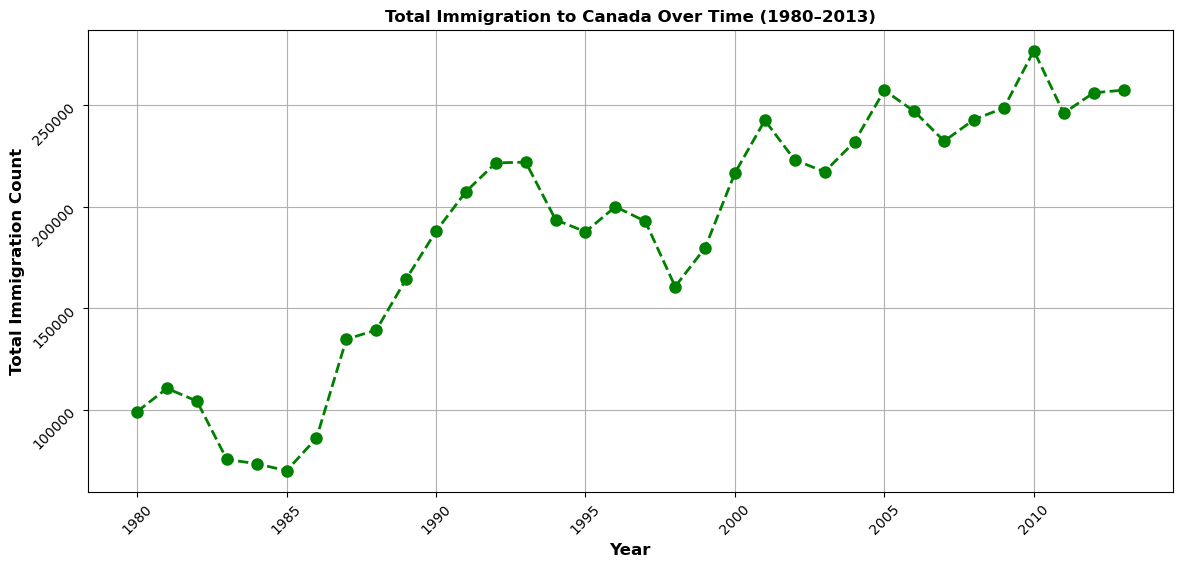

In [13]:
# Setting the figure size for better visualization
plt.figure(figsize=(14, 6))

# Plotting total immigration per year as a line plot
total_immigration_per_year.plot(
    kind='line',  # Line plot to show trends over time
    x=total_immigration_per_year.index,  # X-axis as the years (index of the Series)
    y=total_immigration_per_year.values,  # Y-axis as the total immigration values
    marker='o',  # Adding circular markers to each data point
    markersize=8,  # Marker size for better visibility
    linestyle='--',  # Dashed line style for trend line
    color='green',  # Line color
    linewidth=2  # Line width for emphasis
)

# Adding title and axis labels with bold formatting
plt.title("Total Immigration to Canada Over Time (1980–2013)", fontsize=12, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')

# Rotating x and y ticks for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adding a grid for easier data interpretation
plt.grid(True)

# Displaying the plot
plt.show()

+ Immigration to Canada has shown a steady **increase** from **99,137** in **1980** to over **257,537** by **2013**, with numbers more than **doubling** over this period.
  
+ In the **early 1990s**, there was a significant **rise** in immigration.
  
+ In the **Mid-2000s**, there was Another notable **peak**, which may correspond to economic conditions or strategic immigration initiatives.
  
+  From **2010 onwards**, immigration levels **stabilize** around **250,000** annually, suggesting a balanced approach to managing immigration.

These trends underscore **`Canada`’s** growing **attractiveness** as a destination for immigrants and provide a foundation for more detailed analysis by **`continent`**, **`region`**, and **`country`**.

### 1.2 Growth and Decline Analysis

Examining specific years with significant **increases** or **declines** in immigration allows us to pinpoint periods of rapid growth or decrease and explore potential causes. This understanding helps us investigate factors driving these changes, such as **economic** conditions, **policy** reforms, or **global events**, offering context for **`Canada`’s** evolving immigration trends.

In [14]:
# Year-over-year percentage change in immigration
yearly_percentage_change = total_immigration_per_year.pct_change() * 100
# Highlight years with notable increases or declines (above 10% change)
significant_changes = yearly_percentage_change[yearly_percentage_change.abs() > 10]

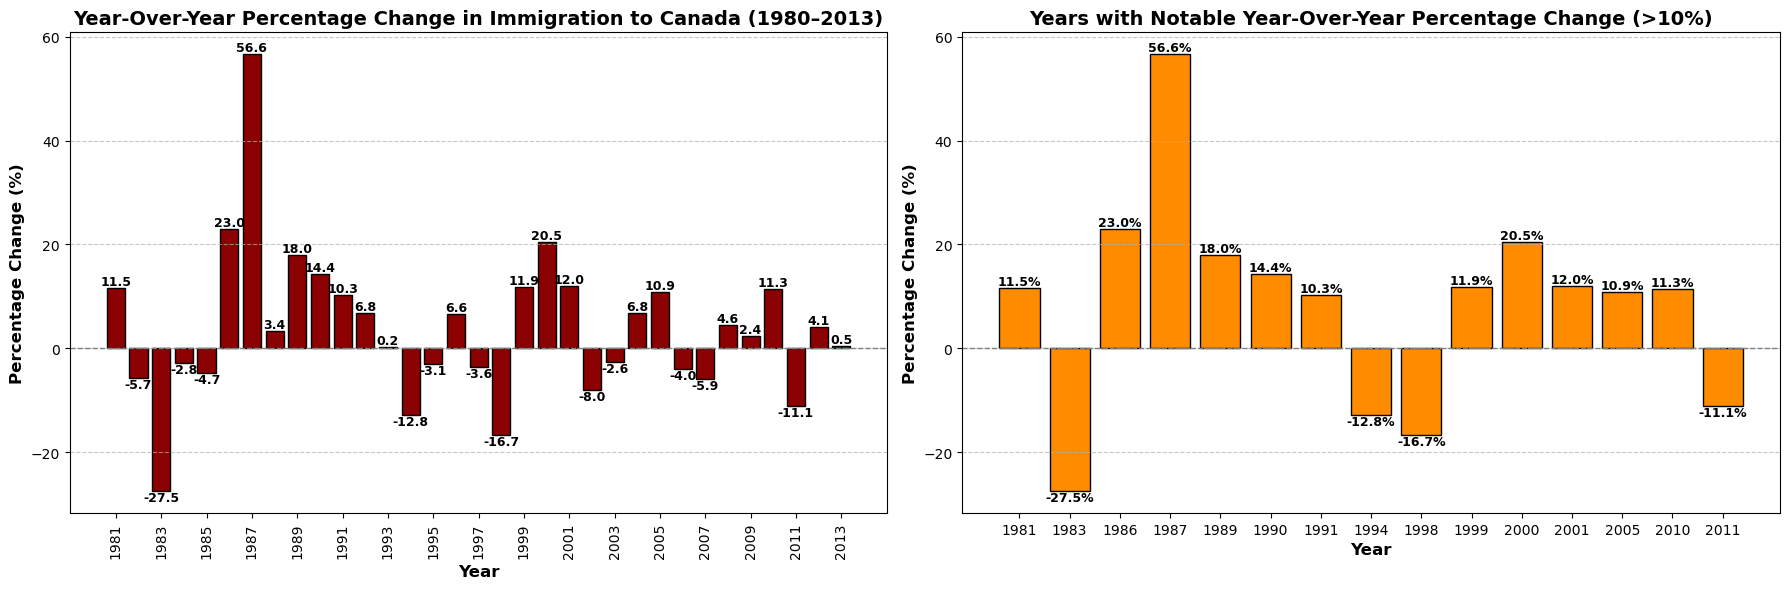

In [15]:
# Creating a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Year-over-year percentage change in immigration

# Dropping the first NaN value resulting from the percentage change calculation
yearly_percentage_change_cleaned = yearly_percentage_change.dropna()

# Plotting the year-over-year percentage change in immigration on the first subplot (axes[0])
axes[0].bar(
    yearly_percentage_change_cleaned.index,  # X-axis: Years
    yearly_percentage_change_cleaned.values,  # Y-axis: Percentage changes
    color='darkred',  # Bar color
    edgecolor='black'  # Edge color for bars
)

# Adding a horizontal line at 0 for visual reference
axes[0].axhline(0, color='grey', linestyle='--', linewidth=1)

# Setting title and axis labels with bold formatting for readability
axes[0].set_title("Year-Over-Year Percentage Change in Immigration to Canada (1980–2013)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Year", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Percentage Change (%)", fontsize=12, fontweight='bold')

# Adding a y-axis grid for clarity
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Setting xticks and rotating xticklabels for readability, displaying every second year
axes[0].set_xticks(yearly_percentage_change_cleaned.index[::2])
axes[0].set_xticklabels(yearly_percentage_change_cleaned.index[::2], rotation=90)

# Adding text labels to highlight each bar’s value for significant changes
for year, change in yearly_percentage_change_cleaned.items():
    axes[0].text(
        year, change, f"{change:.1f}", 
        ha='center', va='bottom' if change > 0 else 'top', 
        fontsize=9, color='black', fontweight='bold'
    )

# Plot 2: Years with notable year-over-year percentage change

# Cleaning significant changes data to include only years with over 10% absolute change
significant_changes_cleaned = significant_changes.dropna()

# Plotting notable changes on the second subplot (axes[1])
axes[1].bar(
    significant_changes_cleaned.index,  # X-axis: Years with significant change
    significant_changes_cleaned.values,  # Y-axis: Change values
    color='darkorange',  # Bar color
    edgecolor='black'  # Edge color for bars
)

# Adding a horizontal line at 0 for visual reference
axes[1].axhline(0, color='grey', linestyle='--', linewidth=1)

# Setting title and axis labels with bold formatting for readability
axes[1].set_title("Years with Notable Year-Over-Year Percentage Change (>10%)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Year", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Percentage Change (%)", fontsize=12, fontweight='bold')

# Adding a y-axis grid for clarity
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels for each bar to highlight percentage changes
for year, change in significant_changes_cleaned.items():
    axes[1].text(
        year, change, f"{change:.1f}%", 
        ha='center', va='bottom' if change > 0 else 'top', 
        fontsize=9, color='black', fontweight='bold'
    )

# Adjusting layout to prevent overlap between subplots
plt.tight_layout()

# Displaying the final plots
plt.show()

+ Immigration to **`Canada`** shows a general upward trend, with periods of **rapid growth** interspersed with **occasional declines**.
  
+ **ignificant Increases:**
  
    + **1987** (**+56.6%**) and **2001** (**+20.5%**) experienced sharp **increases**, likely due to favorable immigration policies or strong economic conditions.
    + **1981**, **1989**, and **2000**, each with over **10% growth**, suggest times when Canada actively encouraged immigration.
      
+ **Notable Declines:**
  
    + **1983** (**-27.5%**) and **1994** (**-12.8%**) stand out as years with **major decreases**, possibly due to restrictive policies or economic downturns.
    + **1998** and **2011**, with decreases over **10%**, hint at temporary reductions in immigration inflows.

### 1.3 Trend by Decades

Analyzing immigration trends by aggregating data across **decades** (**1980s**, **1990s**, **2000s**, and **2010s**) highlights broader patterns of change, smoothing out yearly fluctuations. Observing decade-level trends allows us to see **`Canada`’s** long-term immigration **growth** and identify periods where strategic shifts may have occurred in immigration policy.

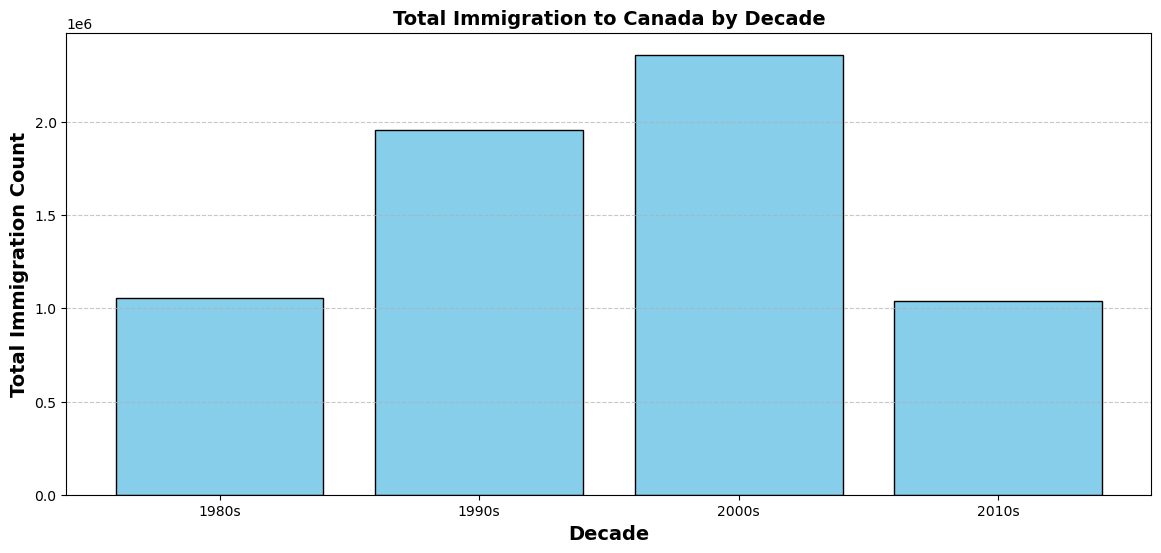

In [16]:
# Calculate the total immigration per year from 1980 to 2013
total_immigration_per_year = df.loc[:, "1980":"2013"].sum()

# Define decades and calculate total immigration for each period
# Summing immigration counts for each decade to observe trends
decades = {
    "1980s": total_immigration_per_year["1980":"1989"].sum(),
    "1990s": total_immigration_per_year["1990":"1999"].sum(),
    "2000s": total_immigration_per_year["2000":"2009"].sum(),
    "2010s": total_immigration_per_year["2010":"2013"].sum()  # Only partial data available for the 2010s
}

# Convert the dictionary of totals into a Pandas Series for easier plotting
decade_totals = pd.Series(decades)

# Plotting total immigration to Canada by decade using a bar chart
plt.figure(figsize=(14, 6))  # Setting figure size for readability
plt.bar(decade_totals.index, decade_totals.values, color='skyblue', edgecolor='black')  # Bar chart with colored bars

# Adding title and axis labels with bold formatting
plt.title("Total Immigration to Canada by Decade", fontsize=14, fontweight='bold')
plt.xlabel("Decade", fontsize=14, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=14, fontweight='bold')

# Adding a grid on the y-axis for easier interpretation of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()

+ **1980s:** Approximately **1.06** million immigrants, establishing a baseline as **`Canada`** began to attract global talent.

+ **1990s:** Immigration nearly **doubled** to **1.95** million, reflecting an active push towards skilled immigration and economic responsiveness.

+ **2000s:** Reached a **peak** of around **2.36** million immigrants, marking **`Canada’s`** highest immigration intake, likely driven by favorable economic conditions and robust immigration policies.

+ **2010s:** Partial data, **4** years (**2010–2013**) shows **1.04** million immigrants, suggesting continued strong immigration levels, although slightly moderated from the **2000s peak**.

This **decade-based analysis** shows **`Canada’s`** evolving immigration landscape, with sustained growth and a **peak** in the **2000s**, highlighting **`Canada’s`** proactive approach to supporting **economic** and **demographic** needs through immigration.

### 1.4 Summary

From **1980** to **2013**, immigration to Canada showed a steady **increase**, doubling from **99,137** to over **257,537**, with notable **peaks** in the early **1990s** and **mid-2000s** due to favorable policies and economic demand. The **1980s** established a baseline with **1.06** million immigrants, the **1990s** saw nearly double at **1.95** million as Canada prioritized skilled immigration, and the **2000s peaked** with **2.36** million driven by strong economic policies. Immigration **stabilized** around **250,000** annually from **2010**, reflecting a balanced approach. Significant **year-over-year** changes highlight key **growth** years like **1987** and **2001** and **declines** in **1983** and **1994**, underscoring **`Canada’s`** adaptability to global and economic shifts. This analysis provides a foundation for deeper insights by **`continent`**, **`region`**, and **`country`**.

### 2. Continent-Level Analysis

In this section, we will conduct a **continent-level analysis** to understand immigration patterns from different parts of the world to **`Canada`** from **1980** to **2013**. By examining **yearly immigration trends by `continent`**, we can identify which **`continents`** have **contributed** most significantly to **Canada’s immigration** pool and observe how these contributions have shifted over time. This analysis provides insight into Canada’s global immigration reach and helps highlight continents with the largest growth trends, aligning with changing policies and global migration patterns.

### 2.1 Immigration by Continent

We will begin by examining **`tota`** immigration from each **`continent`** using a **`stacked area`** chart and **`line`** chart. The **`stacked area`** chart will allow us to see how each continent’s share of **`total`** immigration has evolved over time, while the **`line`** chart will clearly show the **yearly trends** by **`continent`**. This comparison will reveal shifts in each continent’s contribution to **`Canada’s`** immigration landscape.

In [17]:
# Function to check and display the unique continent names in the dataset
def check_continents_name(df):

    print('The continents represented in the dataset are:')
    
    # Loop through each unique continent in the 'Continent' column of the DataFrame
    for continent in df['Continent'].unique():
        print(continent)

# Display the unique continent names
check_continents_name(df)

The continents represented in the dataset are:
Asia
Europe
Africa
Oceania
Latin America and the Caribbean
Northern America


We start by checking the existing **`continent`** names in the dataset to identify any overly **long** or **inconsistent** labels that could pose issues in data visualization. For instance, the name **`Latin America and the Caribbean`** is quite lengthy and may hinder readability in charts. To enhance **aesthetics** and **clarity**, we plan to **replace** this name with **`South America`**. This adjustment will make labels more concise and visually appealing, improving the overall presentation.

In [18]:
# Add "South America" as a new category in the "Continent" column
df["Continent"] = df["Continent"].cat.add_categories("South America")

# Update the values in the "Continent" column
df.loc[df["Continent"] == "Latin America and the Caribbean", "Continent"] = "South America"

# Remove the old category
df["Continent"] = df["Continent"].cat.remove_categories("Latin America and the Caribbean")

In [19]:
# Display the unique continent names (new)
check_continents_name(df)

The continents represented in the dataset are:
Asia
Europe
Africa
Oceania
South America
Northern America


In [20]:
continent_yearly_totals = df.groupby("Continent",observed =True).sum(numeric_only=True).loc[:,"1980":"2013"]
continent_yearly_totals

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775
South America,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950


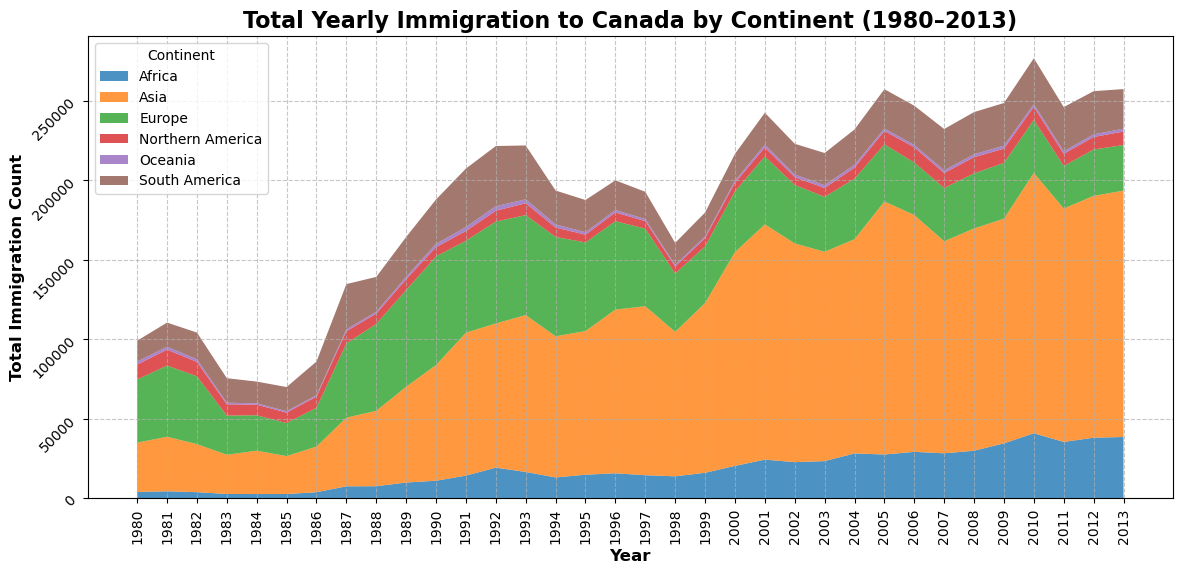

In [21]:
# Stacked Area Chart for yearly immigration by continent
plt.figure(figsize=(14, 6))
plt.stackplot(continent_yearly_totals.columns, continent_yearly_totals, labels=continent_yearly_totals.index, alpha=0.8,)
plt.title("Total Yearly Immigration to Canada by Continent (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.yticks(rotation = 45)
plt.legend(title="Continent",loc ='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

+ The **orange** area (representing **`Asia`**) grows substantially over time, becoming the **largest contributor** by the **mid-1990s** and continuing to dominate throughout the **2000s**. This indicates a significant **increase** in immigration from **Asia**, reflecting Canada's shift towards welcoming skilled immigrants from this region.
  
+ The **green** area (**`Europe`**) remains fairly consistent over time, showing **steady** immigration levels, but its relative share **decreases** as Asia’s contribution grows.
  
+  The smaller **blue** (**`Africa`**) and **brown** (**`South America`**) areas show a gradual **increase**, particularly from the **1990s** onwards, reflecting growing immigration from these regions.

+ The **red** (**`Northern America`**) and **purple** (**`Oceania`**) areas remain **small**, showing little variation over time and indicating a **stable** but relatively **low** number of immigrants from these regions.

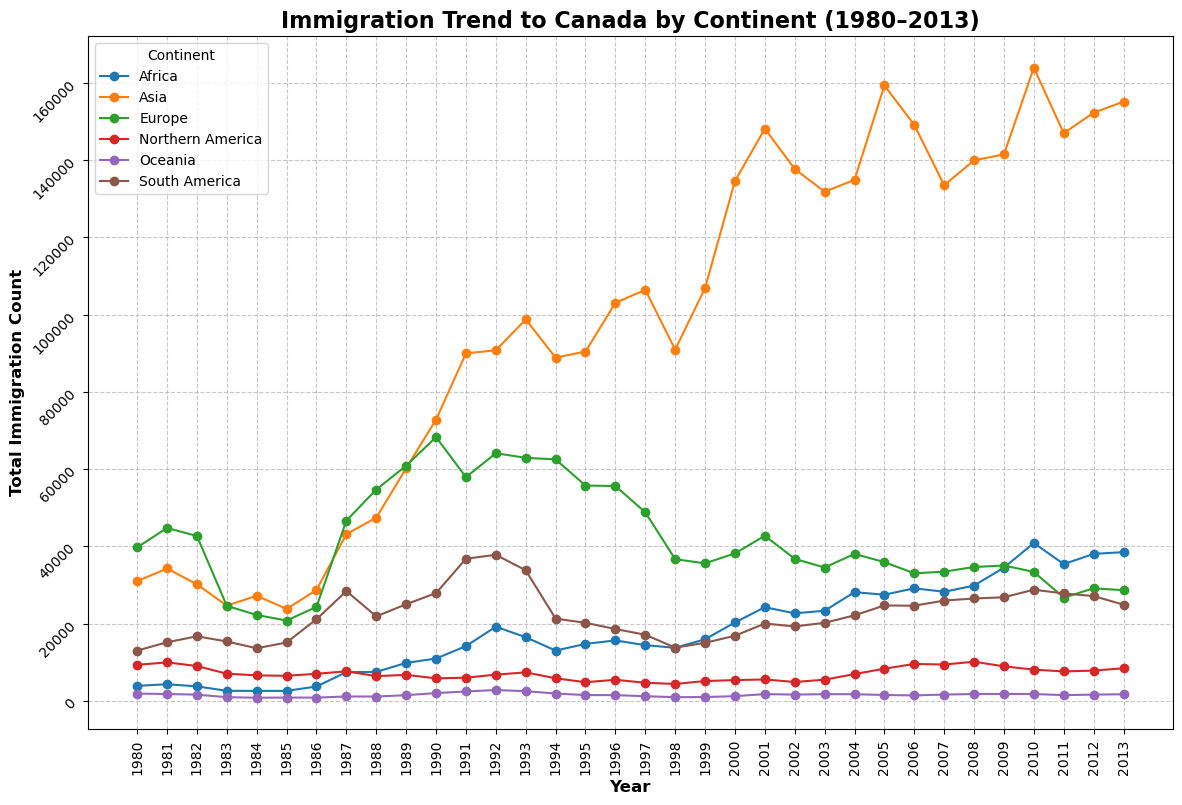

In [22]:
# Line Chart for yearly immigration by continent
plt.figure(figsize=(14, 9))
for continent in continent_yearly_totals.index:
    plt.plot(continent_yearly_totals.columns, continent_yearly_totals.loc[continent], label=continent, marker='o')

plt.title("Immigration Trend to Canada by Continent (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.yticks(rotation = 45)
plt.legend(title="Continent")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

+ The **orange** line (**`Asia`**) shows a **steep upward** trend, especially during the late **1980s** and early **2000s**, **peaking** in the **mid-2000s**. This emphasizes the rapid growth in Asian immigration, making it the leading source of immigrants to Canada.
  
+ The **green** line (**`Europe`**) is relatively **stable**but shows slight **fluctuations**, with a **decline** after the **mid-1990s** as Asia’s influence grows.
  
+ The **blue** (**`Africa`**) and **brown** (**`South America`**) lines show **steady** growth over time, especially from the **1990s**, indicating increasing interest in migration to Canada from these regions.
  
+ The **red** (**`Northern America`**) and **purple** (**Oceania**) lines remain **flat**, highlighting their consistently **low** yet stable contribution to Canada's immigration.

### 2.2 Continent Comparison Over Time

In this part, we’ll focus on comparing the **total** **immigration** growth from **each** **continent** over the period from **1980** to **2013**. By **aggregating** each continent’s total immigration over these years, we can observe which continents have shown the **largest** overall **growth** and understand Canada’s evolving global immigration sources.

In [23]:
# Calculate total immigration for each continent from 1980 to 2013
continent_totals_over_time = df.groupby("Continent",observed =True)['Total'].sum(numeric_only=True)
continent_totals_over_time = continent_totals_over_time.sort_values(ascending = False)
continent_totals_over_time

Continent
Asia                3317794
Europe              1410947
South America        765148
Africa               618948
Northern America     241142
Oceania               55174
Name: Total, dtype: int64

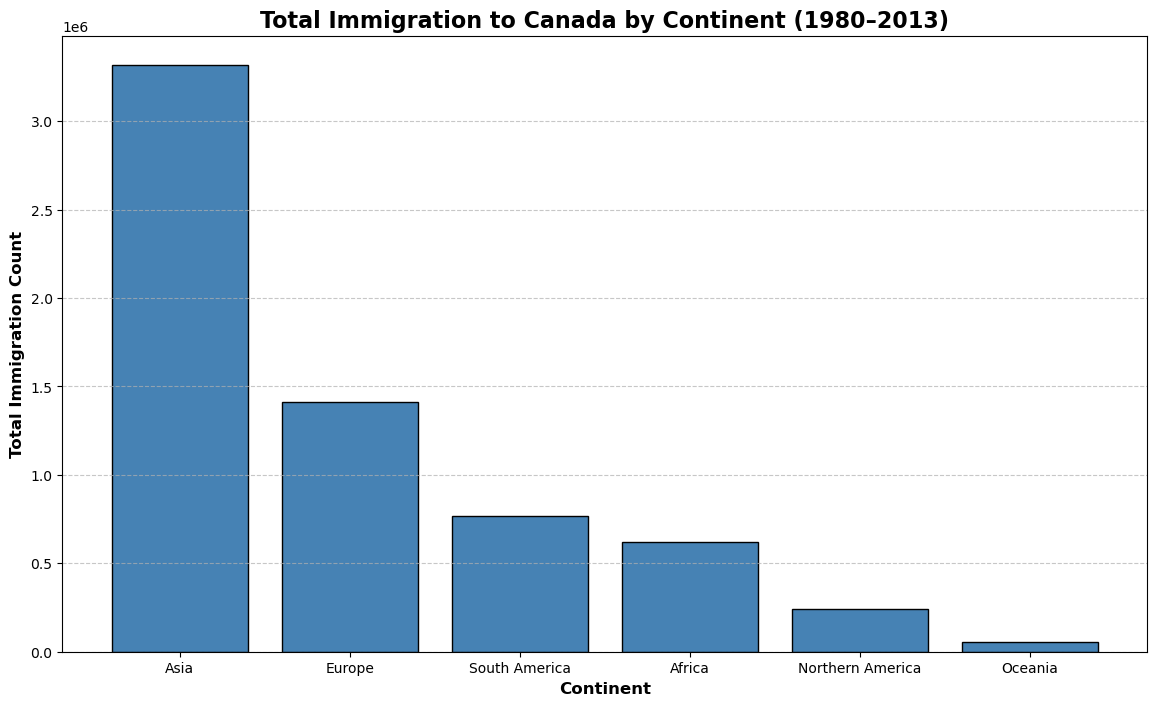

In [24]:
# Bar chart to compare total immigration from each continent
plt.figure(figsize=(14, 8))
plt.bar(continent_totals_over_time.index, continent_totals_over_time.values, color='steelblue', edgecolor='black')
plt.title("Total Immigration to Canada by Continent (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Continent", fontsize=12, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

+ **`Asia`** **leads** with over **3.** million immigrants, reflecting its **dominant** role as a source of immigrants to **`Canada`**.
+ **`Europe`** follows with approximately **1.41** million, showing **consistent** contributions over time.
+ **`South America`** and the **`Caribbean`** (**765,000**) and **Africa** (**619,000**) show **moderate** totals, underscoring their growing importance in recent years.
+ **`Northern America`** (**241,000**) and **`Oceania`** (**55,000**) contributed the **least**, maintaining stable but **lower** immigration levels.

### 2.3 Summary

The **continent-level analysis** highlights a clear evolution in Canada’s immigration sources from **1980** to **2013**. Initially, **`Europe`** played a **major role**, but by the **1990s**, **`Asia`** emerged as the **leading** source, driven by shifts in Canadian immigration policies and broader economic dynamics. With over **3.3** million immigrants, **`Asia`** has become the **dominant** contributor to Canada’s immigrant population. **`Europe`** remains a **consistent source**, contributing approximately **1.41** million immigrants, though its relative share has decreased as Asia's influence has grown.

**`South America`** and the **`Caribbean`** (**765,000**) and **`Africa`** (**619,000**) show **moderate** but steadily **increasing** totals, underscoring their growing importance in Canada’s diverse immigrant landscape. In contrast, **`Northern America`** **241,000**) and **`Oceania`** (**55,000**) have contributed at **lower** but **stable** levels. This shift in immigration patterns reflects Canada’s strategic focus on attracting skilled immigrants from **`Asia`** and other emerging regions, aligning with Canada’s economic goals and evolving demographic needs.

### 3. Region-Level Analysis

In the Region-Level Analysis, we will delve deeper into the data by examining immigration trends for specific regions within each continent (e.g., Eastern Europe, Southern Asia, Northern Africa). This more granular view allows us to identify high-immigration regions, observe trends over time, and compare immigration patterns within each continent. Understanding region-level trends will reveal which areas have consistently contributed high numbers of immigrants, as well as regions with emerging growth or decline in immigration to Canada. This analysis will provide valuable insights into Canada's targeted regions for immigration and help us understand shifts in immigration patterns within continents.
### 3.1  Immigration by Regio

To begin, we’ll explore the total immigration counts across regions to identify high-immigration regions. By creating a bar chart, we can compare immigration contributions from each region, highlighting the areas with the largest immigrant populations.

In [25]:
# Aggregating immigration totals by region (sum over all years)
region_totals = df.groupby('Region',observed=True)["Total"].sum(numeric_only=True)
# Sort the 'region_totals' in descending order
region_totals = region_totals.sort_values(ascending=False)
region_totals

Region
Southern Asia                1398120
Eastern Asia                  841201
South-Eastern Asia            687329
Northern Europe               589584
Eastern Europe                421223
Western Asia                  376120
Caribbean                     308253
South America                 295242
Northern Africa               255451
Northern America              241142
Western Europe                231596
Southern Europe               168544
Eastern Africa                167389
Central America               161653
Western Africa                105901
Middle Africa                  48628
Southern Africa                41579
Australia and New Zealand      34215
Melanesia                      20689
Central Asia                   15024
Polynesia                        234
Micronesia                        36
Name: Total, dtype: int64

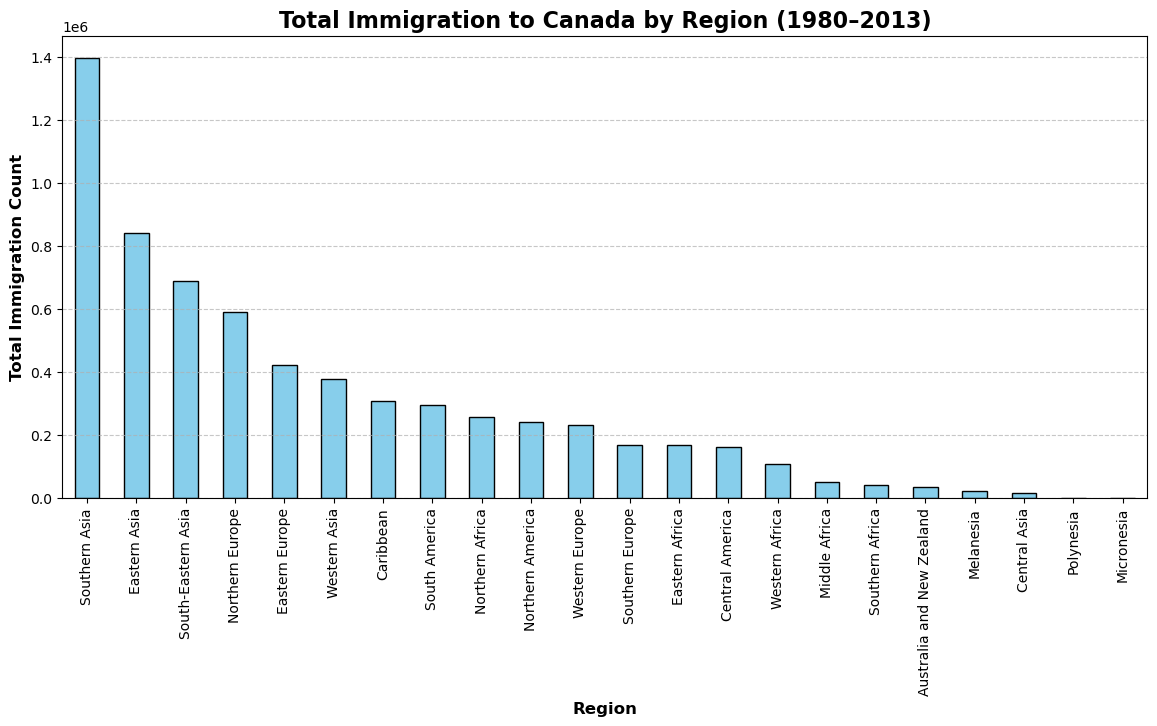

In [26]:
# Plotting a bar chart to compare total immigration counts across regions
plt.figure(figsize=(14, 6))
region_totals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Immigration to Canada by Region (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

+ Southern Asia and Eastern Asia stand out as top contributors, reflecting Canada’s focus on immigration from these areas.
  
+ Western Europe and Northern Europe show consistent but moderate contributions, indicating stable immigration from these regions.
  
+ Eastern Europe and Northern Africa display growing importance, highlighting their steady contributions to Canada’s diverse immigrant population.
  
+ Some regions, such as Melanesia and Micronesia, show minimal immigration, suggesting limited migration flows from these areas.

### 3.2  Regional Trends Over Time

Next, we’ll analyze immigration trends over time for each region by creating line charts. This will allow us to observe how immigration patterns for different regions have evolved, identifying regions with significant increases or decreases and pinpointing emerging trends.

In [27]:
# Summing yearly immigration by region for trend analysis
region_yearly_totals = df.groupby("Region",observed = True).sum(numeric_only=True).loc[:, "1980":"2013"]
region_yearly_totals

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Region,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,1304,1119,848,457,481,467,532,675,610,790,...,1280,1279,1193,1383,1498,1538,1423,1226,1399,1536
Caribbean,7045,8310,8326,6998,5553,6048,8716,10932,9229,10786,...,6630,6816,6652,7826,8862,8847,10549,11958,11898,10393
Central America,734,921,1612,3648,4087,4862,5909,6804,5596,5821,...,3346,3990,4140,5039,4891,4814,5692,5821,6019,5644
Central Asia,0,0,0,0,0,0,0,0,0,0,...,995,1134,903,936,805,962,905,769,1029,691
Eastern Africa,1471,1641,1426,1094,1187,1134,1454,2734,3237,4094,...,7726,7083,6750,6669,6705,6922,8591,8956,8846,9448
Eastern Asia,6836,8895,5481,3254,2624,2979,3416,5403,5887,7796,...,43550,50306,41763,35591,39602,37497,37954,35159,40449,40539
Eastern Europe,1467,3698,6873,5459,4433,3969,6144,8861,11499,18671,...,18360,16724,14389,13886,11988,11759,11803,9612,9464,10011
Melanesia,632,707,816,558,391,448,362,524,564,736,...,497,300,278,304,331,313,401,316,273,233
Micronesia,1,0,0,1,0,0,0,0,1,2,...,1,2,1,3,1,2,0,0,2,1


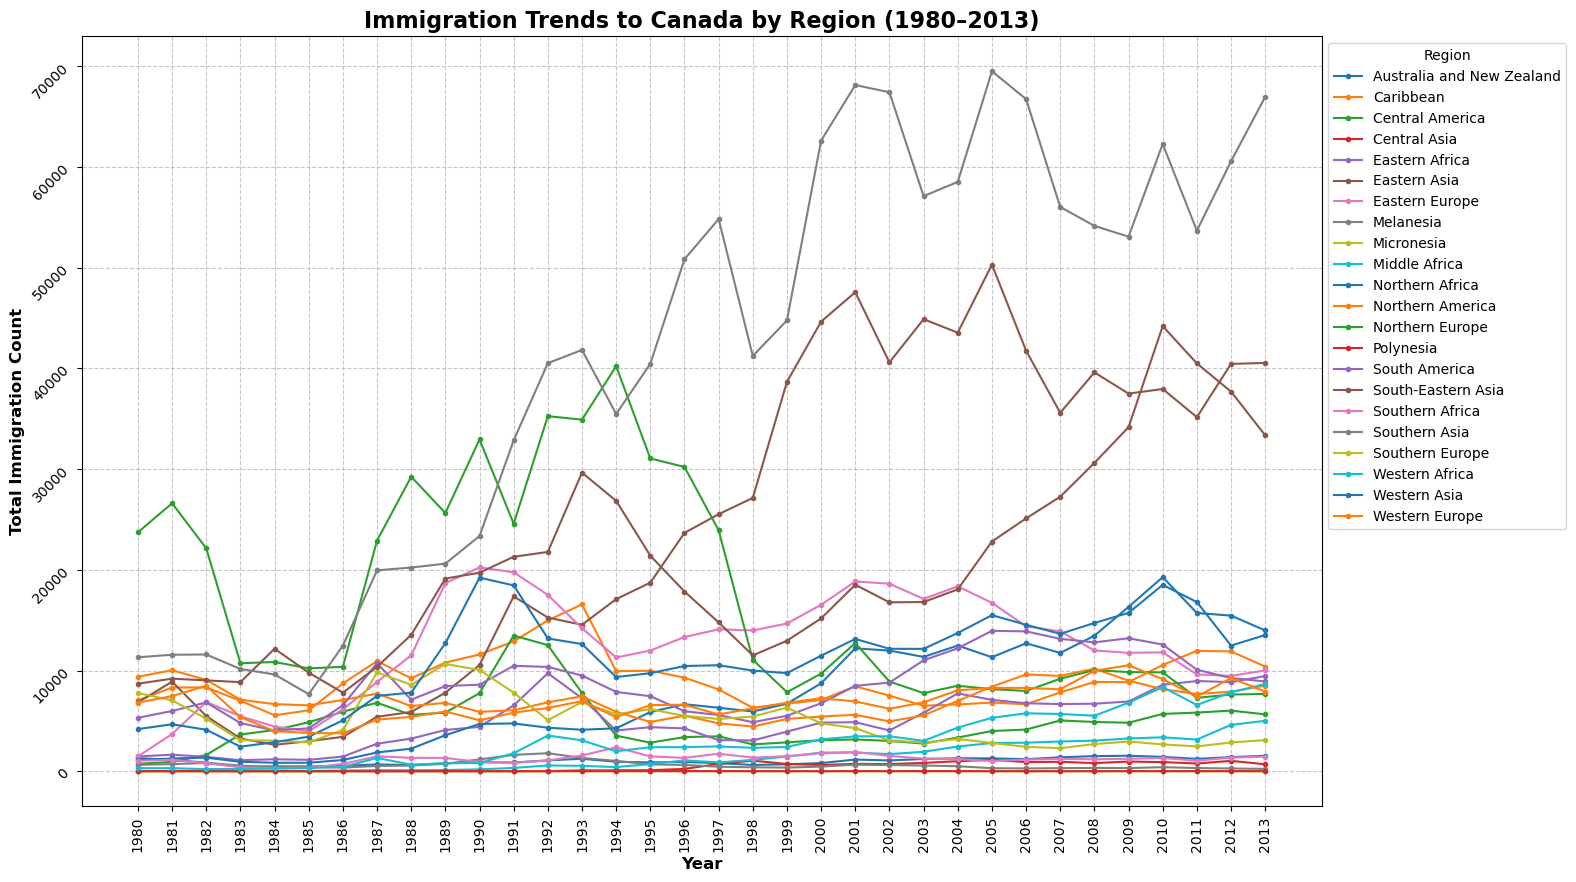

In [28]:
# Plotting a line chart for immigration trends by region over time
plt.figure(figsize=(16, 10))
for region in region_yearly_totals.index:
    plt.plot(region_yearly_totals.columns, region_yearly_totals.loc[region], label=region, marker='o', markersize=3)

plt.title("Immigration Trends to Canada by Region (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.yticks(rotation = 45)
plt.legend(title="Region", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

+ Southern Asia and Eastern Asia show consistent growth, particularly during the late 1980s and early 2000s, reflecting Canada’s growing focus on these regions.
  
+ Eastern Europe and Northern Africa display steady increases, indicating a rising trend in immigration from these areas.
  
+ Western and Northern Europe show stable trends with slight fluctuations, maintaining a moderate level of immigration.
  
+ Some regions, such as Oceania and Micronesia, remain largely flat, indicating limited immigration variation over time.

### 3.3  Comparison Within Continents

Finally, we will compare regions within each continent to observe patterns and differences. By examining regional trends within continents, we can identify which areas are the most prominent sources of immigrants within each continent and observe any intra-continental shifts over time.

In [29]:
# Group by continent and region, then sum across years for each region within each continent
continent_region_totals = df.groupby(['Continent','Region'],observed = True)["Total"].sum(numeric_only=True).unstack()

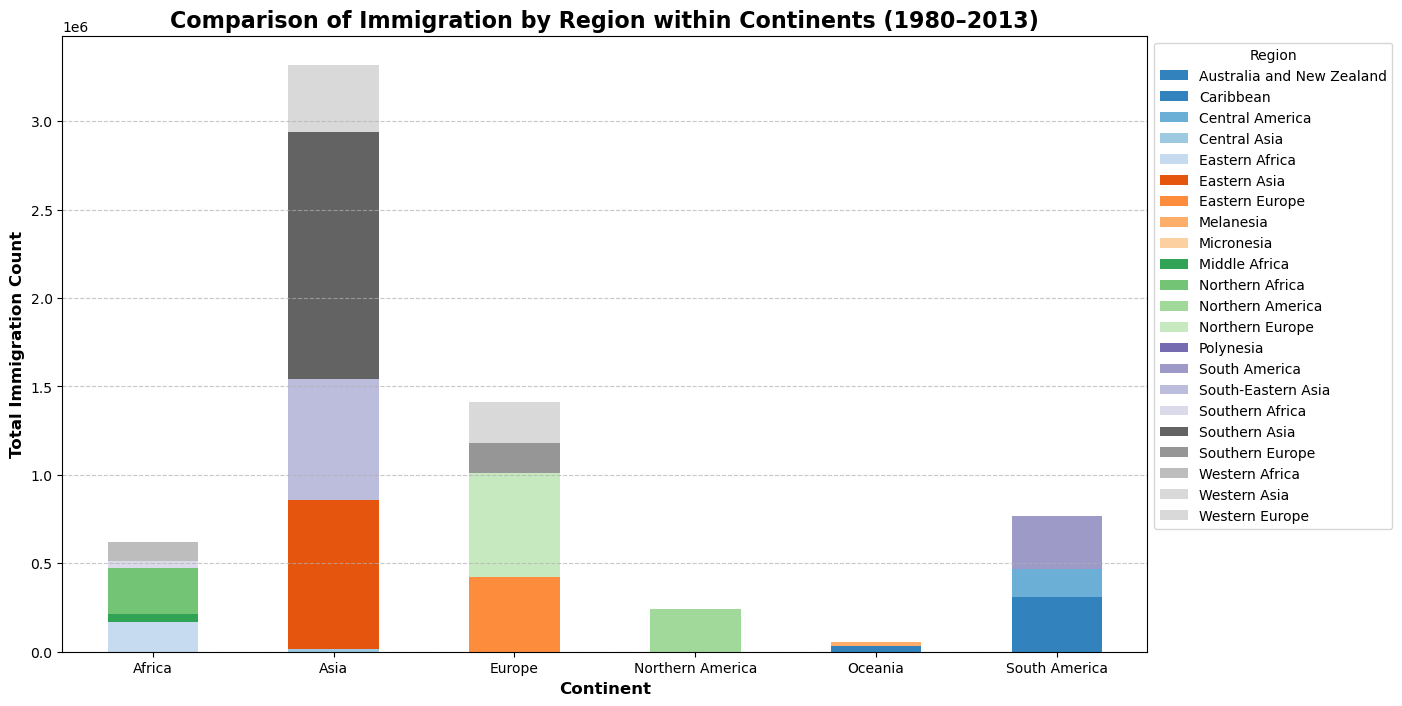

In [30]:
# Plotting a stacked bar chart to compare regions within each continent
continent_region_totals.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title("Comparison of Immigration by Region within Continents (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Continent", fontsize=12, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Region", bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

+ Asia: Dominated by Southern Asia and Eastern Asia, underscoring the strong immigration contributions from these regions.

+ Europe: Western and Eastern Europe are the largest contributors, reflecting stable and diversified immigration from different parts of Europe.

+ Africa: Northern and Eastern Africa contribute the most immigrants, showing regional diversity within African immigration to Canada.

+ Latin America and the Caribbean: Primarily driven by the Caribbean and South America regions, indicating Canada’s strong connection to these areas.

### 3.4 Summary

The region-level analysis provides a comprehensive view of Canada’s immigration sources, highlighting both high-immigration regions and emerging trends. Southern Asia, Eastern Asia, and Western Europe are the leading contributors, reflecting Canada’s sustained focus on these areas. Additionally, regions like Northern Africa and Eastern Europe show rising trends, increasingly adding to Canada’s immigrant diversity. Within each continent, specific regions stand out—such as Southern and Eastern Asia within Asia, and Western and Eastern Europe within Europe—revealing distinct patterns and primary sources of immigration within continents. This analysis underscores the diversity and evolving nature of Canada’s immigration landscape.

### 4. Developed vs. Developing Regions (DevName)

In this section, we analyze immigration trends to Canada based on the "DevName" classification, which categorizes regions as either Developed or Developing. By examining immigration patterns from these two classifications, we can gain insights into the differences between immigrants coming from economically developed regions versus those from developing areas. This analysis will help us understand how global economic and political factors might influence immigration trends, as well as Canada's role in welcoming immigrants from diverse economic backgrounds.

### 4.1 Immigration Trends Over Time by Development Classification (DevName)

We start by analyzing the overall immigration trends for developed and developing regions. By visualizing these trends through line charts, we can observe the yearly immigration counts from each classification and identify any overarching patterns that distinguish developed from developing regions.

In [31]:
# Aggregating immigration totals by DevName classification (Developed vs. Developing) for each year
devname_yearly_totals = df.groupby("DevName",observed = True).sum(numeric_only=True).loc[:, "1980":"2013"]
devname_yearly_totals

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
DevName,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,...,47325,46695,45071,45591,47664,46805,44158,36946,39682,39712
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,...,184758,210762,201986,186814,195383,201963,232798,209248,216540,217825


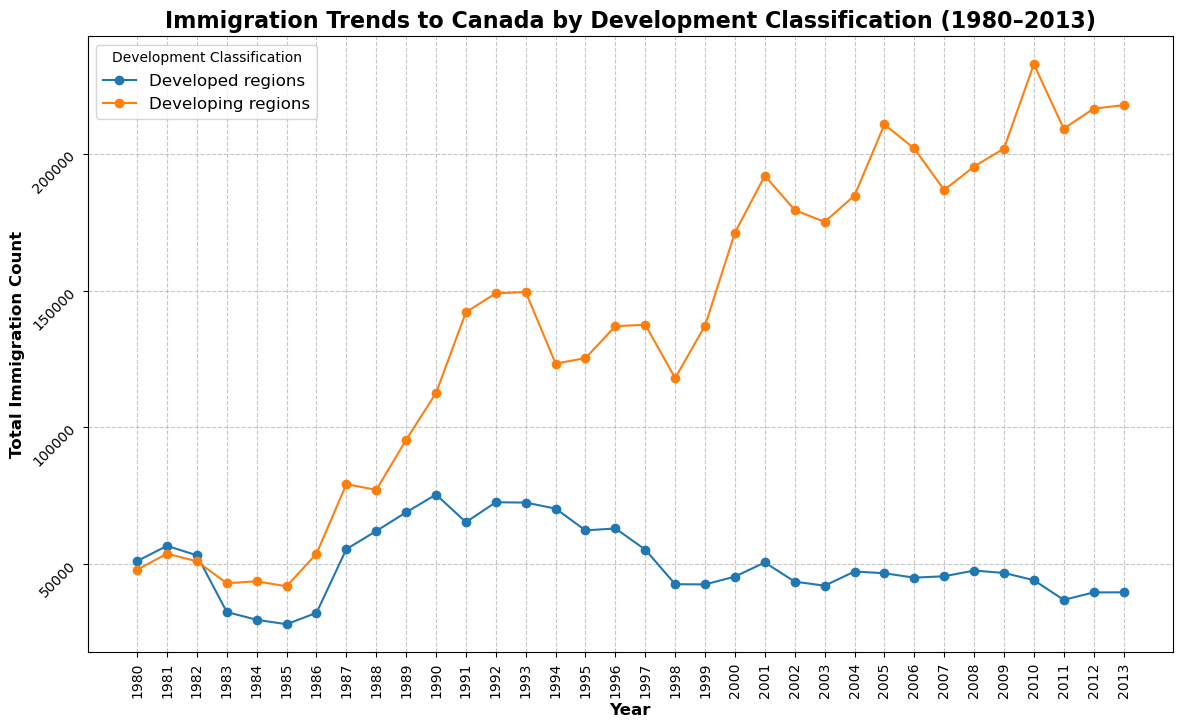

In [32]:
# Plotting a line chart to show immigration trends from Developed and Developing regions
plt.figure(figsize=(14, 8))
for devname in devname_yearly_totals.index:
    plt.plot(devname_yearly_totals.columns, devname_yearly_totals.loc[devname], label=devname, marker='o')

plt.title("Immigration Trends to Canada by Development Classification (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.yticks(rotation = 45)
plt.legend(title="Development Classification", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

+ Developing Regions Show a steady and significant increase in immigration over time, especially from the late 1980s onwards. This trend reflects Canada’s focus on attracting immigrants from emerging economies, likely influenced by increased global migration and Canada’s need for skilled labor.
  
+ Immigration from developed regions is more stable, with moderate increases and occasional fluctuations. This indicates a relatively consistent flow of immigrants from developed countries, possibly due to established migration patterns and a focus on specific skill sets or economic factors.

### 4.2 Trend Differences Between Developed and Developing Regions

Next, we will analyze the differences in trends between developed and developing regions in greater detail. By examining fluctuations, peaks, and troughs for each classification, we can understand how economic or political factors may have influenced immigration patterns differently for developed and developing regions.

+ Immigration from developing regions rises sharply from the late 1980s, possibly influenced by factors such as economic liberalization in Asia, global migration shifts, and Canada’s interest in skilled labor from emerging markets.
  
+ Developed regions show consistent immigration with fewer fluctuations, reflecting Canada’s established migration channels and possible focus on specialized skill-based immigration from these countries.
  
+ Events such as economic recessions, policy changes, or global conflicts might have influenced these trends. For example, immigration from developing regions may increase during periods of economic or political instability in those countries, as individuals seek stability and opportunities in Canada.

### 4.3 Comparison of DevName Within Continents

In this part, we aim to analyze how the development classification (Developed vs. Developing) influences immigration patterns within each continent. By comparing developed and developing regions within each continent, we can uncover intra-continental differences and see how economic factors impact immigration. This analysis helps us understand which continents have a more balanced immigration distribution and where the majority of immigrants come from developing regions.

In [33]:
# Aggregating immigration totals by DevName and Continent
devname_continent_totals = df.groupby(["Continent", "DevName"],observed=True).sum(numeric_only=True).loc[:, "1980":"2013"].sum(axis=1).unstack()

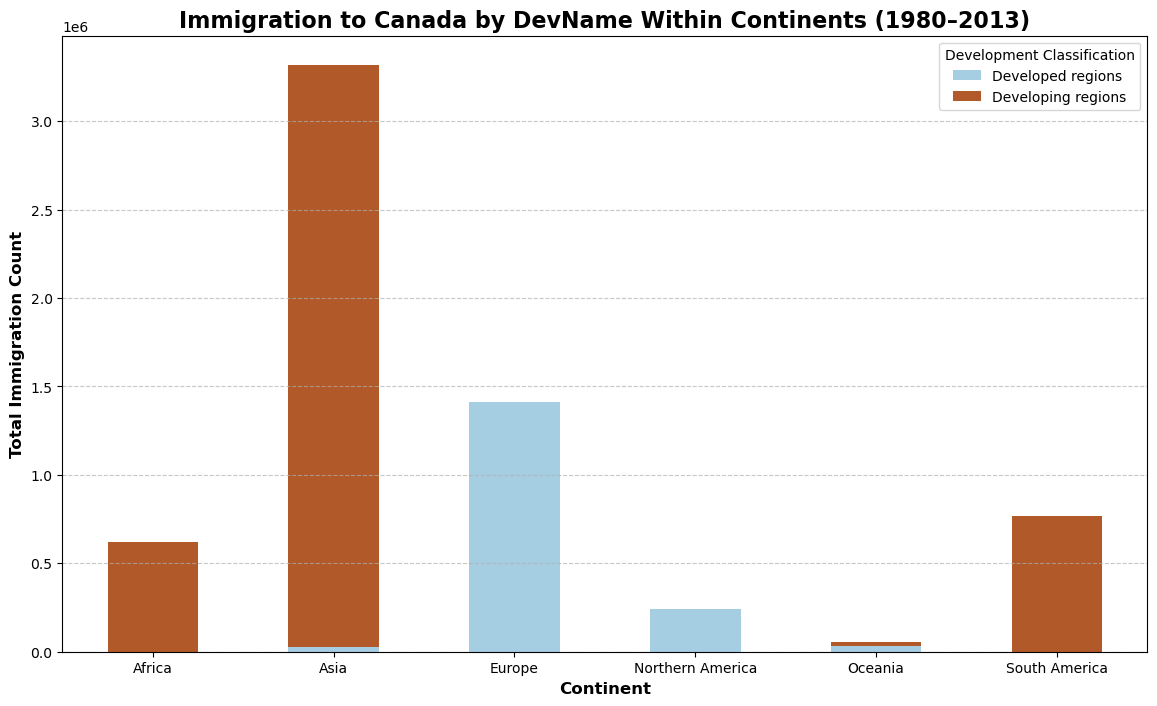

In [34]:
# Plotting a stacked bar chart to show immigration by DevName within each continent
devname_continent_totals.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Paired')
plt.title("Immigration to Canada by DevName Within Continents (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Continent", fontsize=12, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.legend(title="Development Classification")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Asia: The majority of immigrants come from developing regions, underscoring Canada’s focus on emerging markets within Asia, particularly countries like India and the Philippines.
Europe: Immigration is more balanced between developed and developing regions, with a significant contribution from developed countries like the UK and France, alongside growing contributions from Eastern European countries.
Africa: Almost all immigration from Africa is from developing regions, reflecting the continent’s economic profile and Canada’s openness to immigrants from these areas.
Latin America and the Caribbean: Dominated by developing regions, showing that most immigrants from this continent come from countries with emerging economies.
Northern America and Oceania: The smallest immigrant contributions, primarily from developed regions, reflecting Canada’s limited but steady migration ties with economically developed areas in these continents.

### 4.4 Comparison of DevName Within Regions

In this section, we’ll analyze how development classifications differ within specific regions, observing whether developed or developing regions within each area contribute more to Canada’s immigration. This breakdown provides a deeper understanding of the regional economic diversity among immigrants from each development classification and highlights how Canada’s immigration policy has adapted to attract individuals from various economic contexts.

In [35]:
# Aggregating immigration totals by DevName and Region
devname_region_totals = df.groupby(["Region", "DevName"],observed=True).sum(numeric_only=True).loc[:, "1980":"2013"].sum(axis=1).unstack()

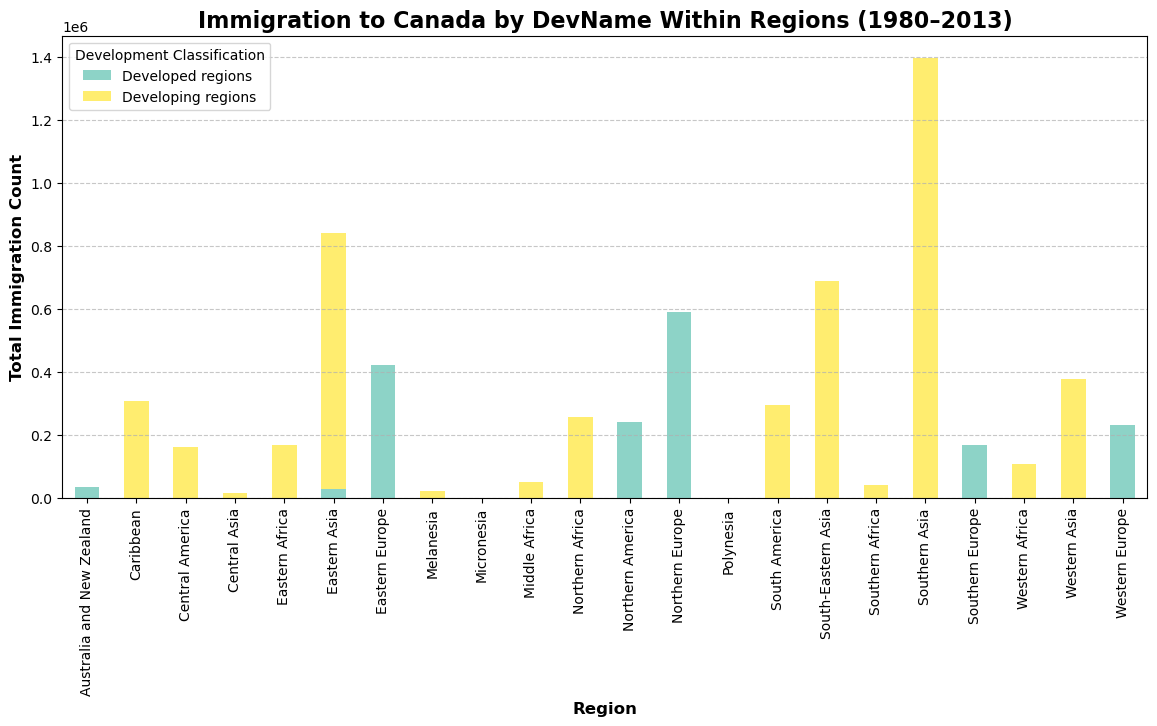

In [36]:
# Plotting a stacked bar chart to show immigration by DevName within each region
devname_region_totals.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set3')
plt.title("Immigration to Canada by DevName Within Regions (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.legend(title="Development Classification",loc = 'upper left')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Western and Eastern Europe: Show a mix of both developed and developing sources. Western Europe is primarily composed of immigrants from developed countries, while Eastern Europe sees a substantial contribution from developing areas.
Southern Asia and Eastern Asia: Heavily dominated by developing regions, aligning with Canada’s emphasis on attracting immigrants from emerging economies within Asia.
Northern Africa: Primarily composed of immigrants from developing countries, reflecting economic conditions and migration motivations from this region.
Caribbean: Entirely from developing regions, showing strong immigration flows from less economically developed nations within this area.
Northern America and Oceania: Primarily from developed regions, given the high economic development levels of countries in these regions, such as the United States and Australia.

### 4.5 Summary

The analysis of immigration by DevName classification highlights Canada’s evolving focus on attracting immigrants from both developing and developed regions, with a marked rise in immigration from developing areas since the late 1980s. This trend aligns with global economic shifts and reflects Canada’s strategic emphasis on skilled labor from emerging markets, driven by economic and demographic needs. In contrast, immigration from developed regions has remained stable, showing Canada’s reliance on established migration channels and the consistent demand for specialized skills from these economies.

Further analysis within continents and regions reveals a nuanced approach: developing regions in Asia, Africa, and Latin America have become prominent sources, while Europe shows a balanced mix of developed and developing contributors. Regionally, Southern Asia, Eastern Asia, and the Caribbean are primarily represented by developing countries, whereas Western Europe and Northern America see steady immigration from developed nations. This diversity underscores Canada’s commitment to a balanced and adaptable immigration strategy that supports economic growth and fosters a multicultural society by welcoming immigrants from diverse economic backgrounds.

### 5. Country-Level Insights

In this section, we will explore immigration trends at the country level to gain specific insights into which countries have contributed the most to Canada’s immigrant population. Analyzing immigration at the country level allows us to identify high-immigration countries, track trends over time, and observe unique patterns among countries within the same region. These insights provide a clearer view of Canada's international connections and show how specific countries have influenced Canada's demographic landscape. Additionally, we will rename "United Kingdom of Great Britain and Northern Ireland" to "UK" for clarity and simplicity in our visualizations.

In [37]:
# Renaming "United Kingdom of Great Britain and Northern Ireland" to "UK" in the Country column
df['Country'] = df['Country'].cat.rename_categories({ "United Kingdom of Great Britain and Northern Ireland": "UK" })

### 5.1 Top Contributing Countries by Total Immigration

Next, we identify the top 3 countries by total immigration to Canada from 1980 to 2013 and present a bar chart illustrating their contributions. This comparison will provide insights into the countries with the largest immigrant populations in Canada, shedding light on Canada’s key immigration sources.

In [38]:
# Calculating the total immigration per country and identifying the top 5 countries
top_countries = df.groupby("Country",observed = False).sum(numeric_only=True).loc[:, "1980":"2013"].sum(axis=1).nlargest(3)
top_countries

Country
India    691904
China    659962
UK       551500
dtype: int64

In [39]:
# Extracting yearly immigration data for the top 5 countries
top_countries_data = df[df['Country'].isin(top_countries.index)].set_index("Country").loc[:, "1980":"2013"]
top_countries_data

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
UK,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827


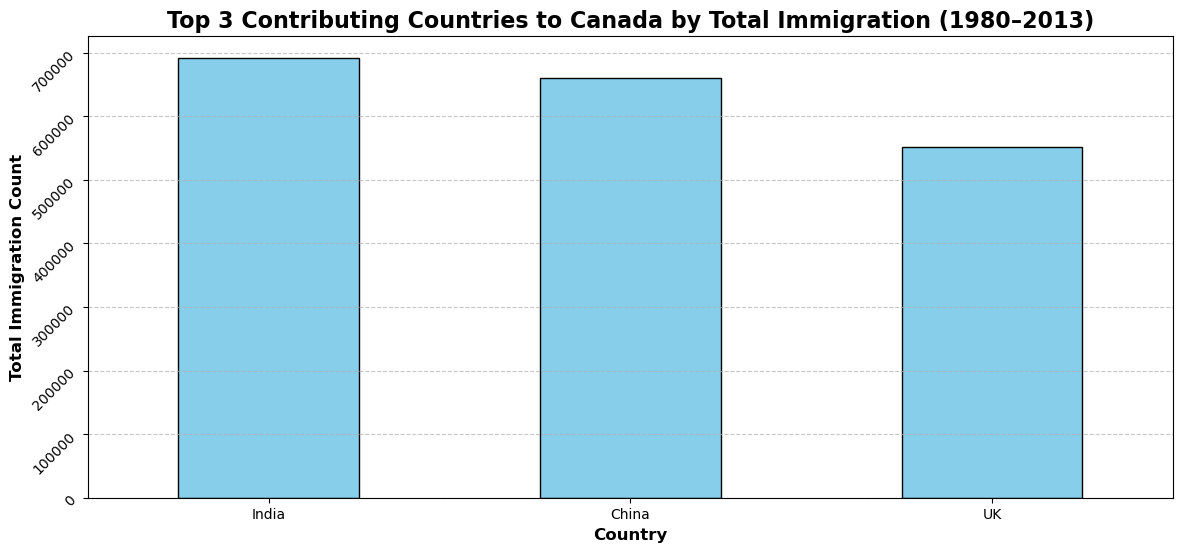

In [40]:
# Plotting a bar chart for total immigration by the top 3 countries
plt.figure(figsize=(14, 6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 3 Contributing Countries to Canada by Total Immigration (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.yticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

+ India leads as the largest contributor, followed closely by China, both surpassing 600,000 immigrants.

+ The UK, while slightly lower, remains a significant source of immigration, demonstrating Canada's long-standing ties with this country.

### 5.2 Top Contributing Countries Trend Over Time

We begin by analyzing immigration trends over time for the top contributing countries. By identifying the top 3 countries by total immigration and plotting their trends from 1980 to 2013, we can see how immigration from these countries has evolved and gain insights into significant periods of growth or decline.

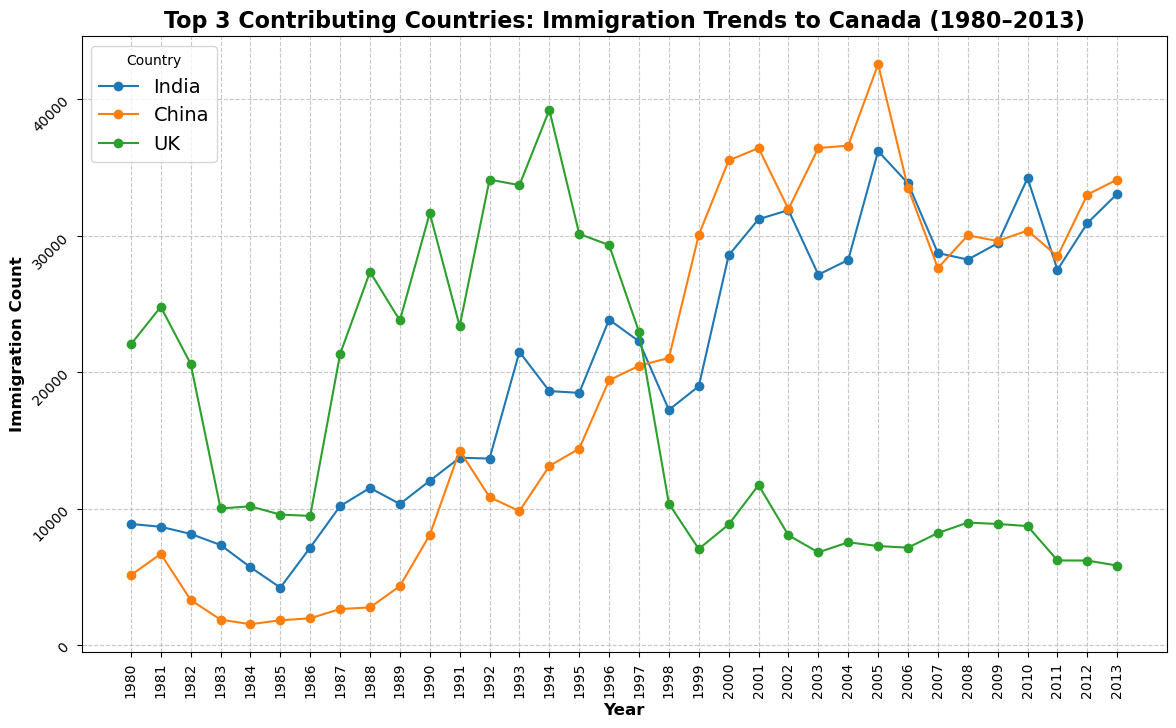

In [41]:
# Plotting line chart for the top 5 contributing countries over time
plt.figure(figsize=(14, 8))
for country in top_countries.index:
    plt.plot(top_countries_data.columns, top_countries_data.loc[country], label=country, marker='o')

plt.title("Top 3 Contributing Countries: Immigration Trends to Canada (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Immigration Count", fontsize=12, fontweight='bold')
plt.yticks(rotation = 45)
plt.legend(title="Country",loc="upper left",fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

+ India and China both countries show significant and sustained increases over time, especially in the 2000s. This reflects Canada’s focus on skilled labor immigration from these high-population nations.

+ UK displays a more stable immigration trend with some fluctuations, likely due to long-established migration pathways.

### 5.3 Summary

India and China lead as Canada’s top immigration sources, each surpassing 600,000 immigrants, reflecting a strong focus on skilled labor from these high-population nations, especially since the 2000s. The UK, while slightly lower, remains a key contributor, showcasing Canada’s long-standing ties and stable migration pathways. This balanced approach highlights Canada’s strategic commitment to attracting talent from both emerging and established economies, building a diverse immigrant base.

### 6. Correlation and Comparative Analysis

In [42]:
# Selecting numerical columns (immigration counts by year) and calculating the correlation matrix
numerical_data = df.loc[:, "1980":"Total"]
correlation_matrix = numerical_data.corr()
correlation_matrix

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
1980,1.000000,0.991703,0.968006,0.893311,0.848537,0.870718,0.864686,0.925409,0.935857,0.850381,...,0.503715,0.534406,0.577895,0.583241,0.571109,0.541269,0.512183,0.511260,0.508873,0.772142
1981,0.991703,1.000000,0.982324,0.904120,0.858406,0.879948,0.865317,0.922400,0.938921,0.863011,...,0.500947,0.527281,0.568801,0.575158,0.559871,0.527354,0.501950,0.502528,0.498964,0.771990
1982,0.968006,0.982324,1.000000,0.949118,0.895561,0.909932,0.910082,0.944414,0.956887,0.905415,...,0.458463,0.495713,0.540289,0.544824,0.530605,0.502233,0.475136,0.471784,0.468099,0.750409
1983,0.893311,0.904120,0.949118,1.000000,0.952277,0.951551,0.965213,0.917773,0.899637,0.886979,...,0.532011,0.582085,0.625322,0.626185,0.615436,0.594577,0.570482,0.564753,0.563527,0.787763
1984,0.848537,0.858406,0.895561,0.952277,1.000000,0.989813,0.925161,0.869288,0.853361,0.840380,...,0.453254,0.506330,0.547469,0.543055,0.533729,0.507379,0.483506,0.475827,0.479422,0.719975
1985,0.870718,0.879948,0.909932,0.951551,0.989813,1.000000,0.943560,0.891233,0.865158,0.847086,...,0.438906,0.487279,0.530320,0.529079,0.515043,0.483053,0.461900,0.454160,0.456544,0.712751
1986,0.864686,0.865317,0.910082,0.965213,0.925161,0.943560,1.000000,0.948285,0.899459,0.900171,...,0.517892,0.565047,0.606541,0.604476,0.590600,0.566330,0.539501,0.533286,0.536550,0.772714
1987,0.925409,0.922400,0.944414,0.917773,0.869288,0.891233,0.948285,1.000000,0.977141,0.947107,...,0.458458,0.498788,0.545437,0.550131,0.539768,0.519822,0.489668,0.479554,0.475170,0.757641
1988,0.935857,0.938921,0.956887,0.899637,0.853361,0.865158,0.899459,0.977141,1.000000,0.963495,...,0.445045,0.483128,0.531271,0.536183,0.528864,0.511815,0.479633,0.469575,0.464122,0.754547
1989,0.850381,0.863011,0.905415,0.886979,0.840380,0.847086,0.900171,0.947107,0.963495,1.000000,...,0.464714,0.502199,0.550563,0.561432,0.555629,0.544482,0.523549,0.507203,0.496802,0.756176


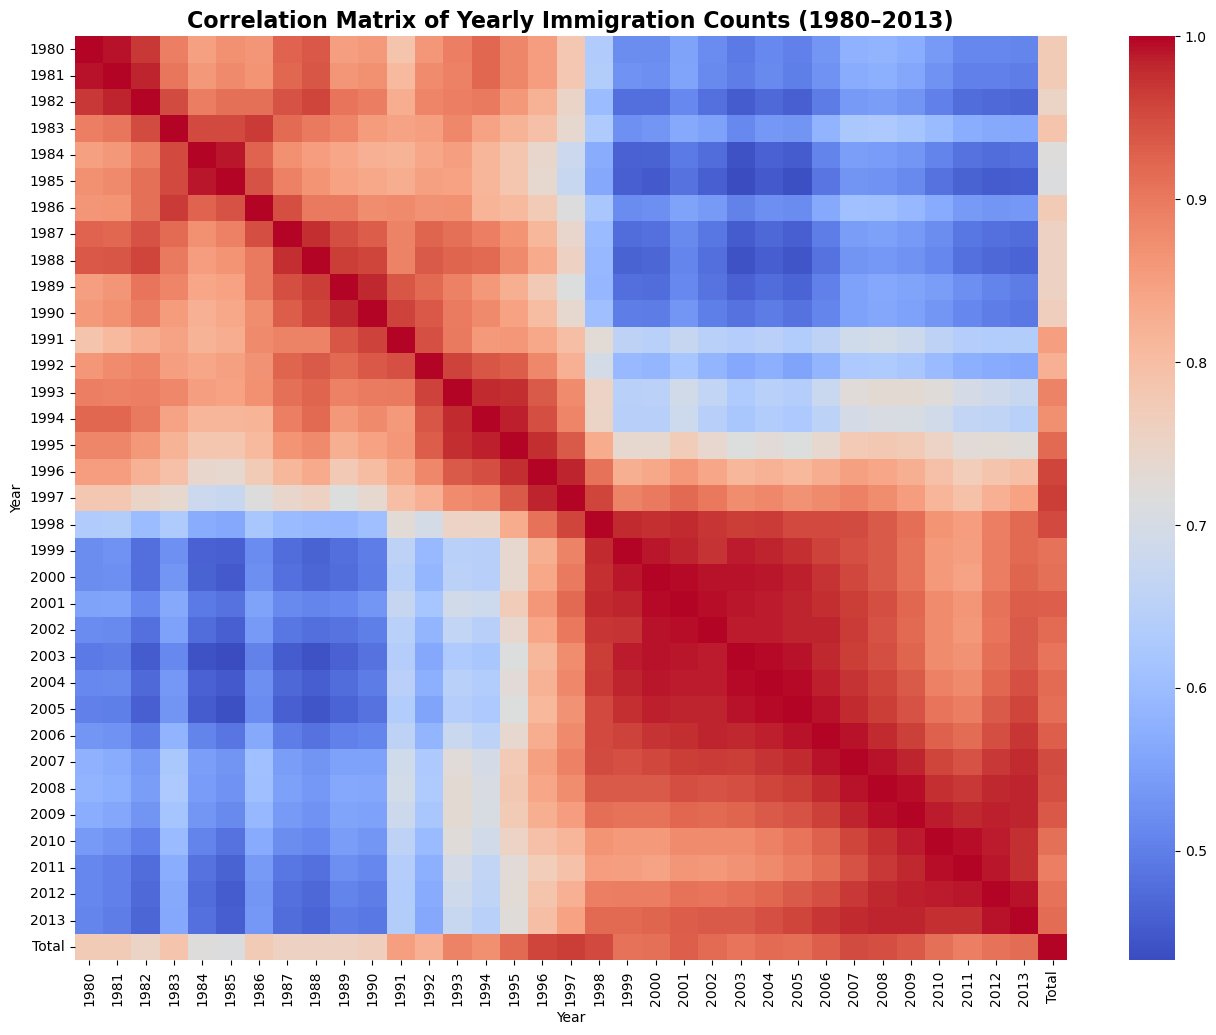

In [43]:
# Plotting the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Yearly Immigration Counts (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Year")
plt.show()

+ There are high correlations between consecutive years, indicating consistent growth patterns in immigration over time.
  
+ Immigration counts in the 1980s are highly correlated, as are those in the 2000s, suggesting distinct growth phases where immigration numbers either steadily increased or remained stable.

### 7. In-Depth Analysis: Africa, North Africa, and Morocco

In this section, as an African and a native of Morocco, I have added an in-depth analysis of African immigration to Canada to draw insights and gain a comprehensive view of immigration patterns from my continent and, in particular, from my home country, Morocco. This analysis focuses on identifying the top African countries contributing to immigration trends, examining specific patterns in North Africa, and exploring the unique socio-economic factors that influence migration from Morocco. This exploration allows us to highlight the diversity within African immigration to Canada and uncover meaningful regional trends.

### 7.1 African Immigration to Canada

We begin by analyzing immigration patterns from Africa, identifying the top 3 African countries by total immigration. By understanding which countries contribute the most, we can recognize Canada's key connections within Africa and observe any notable trends over time.

In [44]:
africa_data = df[df["Continent"] == "Africa"]
africa_data

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113
19,Benin,Africa,Western Africa,Developing regions,2,5,4,3,4,3,...,95,116,183,205,238,290,284,391,397,2852
23,Botswana,Africa,Southern Africa,Developing regions,10,1,3,3,7,4,...,7,11,8,28,15,42,53,64,76,396
27,Burkina Faso,Africa,Western Africa,Developing regions,2,1,3,2,3,2,...,91,147,136,139,162,186,144,269,322,2043
28,Burundi,Africa,Eastern Africa,Developing regions,0,0,0,0,1,2,...,626,468,614,448,566,529,604,684,480,8110
29,Cabo Verde,Africa,Western Africa,Developing regions,1,1,2,0,11,1,...,5,7,2,5,1,3,3,6,2,201
31,Cameroon,Africa,Middle Africa,Developing regions,9,2,16,7,8,13,...,604,697,1025,1279,1344,1800,1638,2507,2439,16021
33,Central African Republic,Africa,Middle Africa,Developing regions,4,3,1,0,0,0,...,49,18,30,28,19,26,18,45,169,550
34,Chad,Africa,Middle Africa,Developing regions,0,0,1,0,0,1,...,126,96,131,95,87,98,79,97,86,1653


In [45]:
# Identifying the top 5 African countries by total immigration
africa_totals = africa_data.groupby("Country",observed = True)["Total"].sum().sort_values(ascending=False)
top_3_african_countries = africa_totals.head()
top_3_african_countries

Country
Egypt           72745
Morocco         72267
Algeria         69439
Somalia         42109
South Africa    40568
Name: Total, dtype: int64

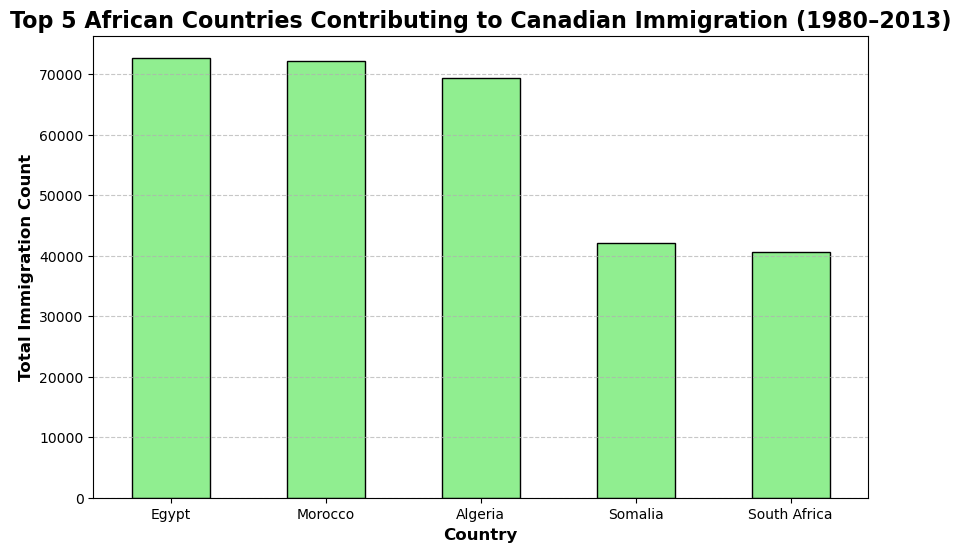

In [46]:
# Plotting a bar chart for the top 3 African countries
plt.figure(figsize=(10, 6))
top_3_african_countries.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 5 African Countries Contributing to Canadian Immigration (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart showcases the top 5 African countries contributing to immigration to Canada over the period from 1980 to 2013. Egypt, Morocco, and Algeria emerge as the leading contributors, each surpassing 70,000 immigrants, followed by Somalia and South Africa. The dominance of North African countries (Egypt, Morocco, and Algeria) highlights strong migration connections with Canada, likely driven by cultural, economic, and historical factors. Somalia and South Africa’s moderate contributions reflect additional migration patterns linked to regional dynamics and Canada’s focus on attracting diverse immigrant backgrounds.

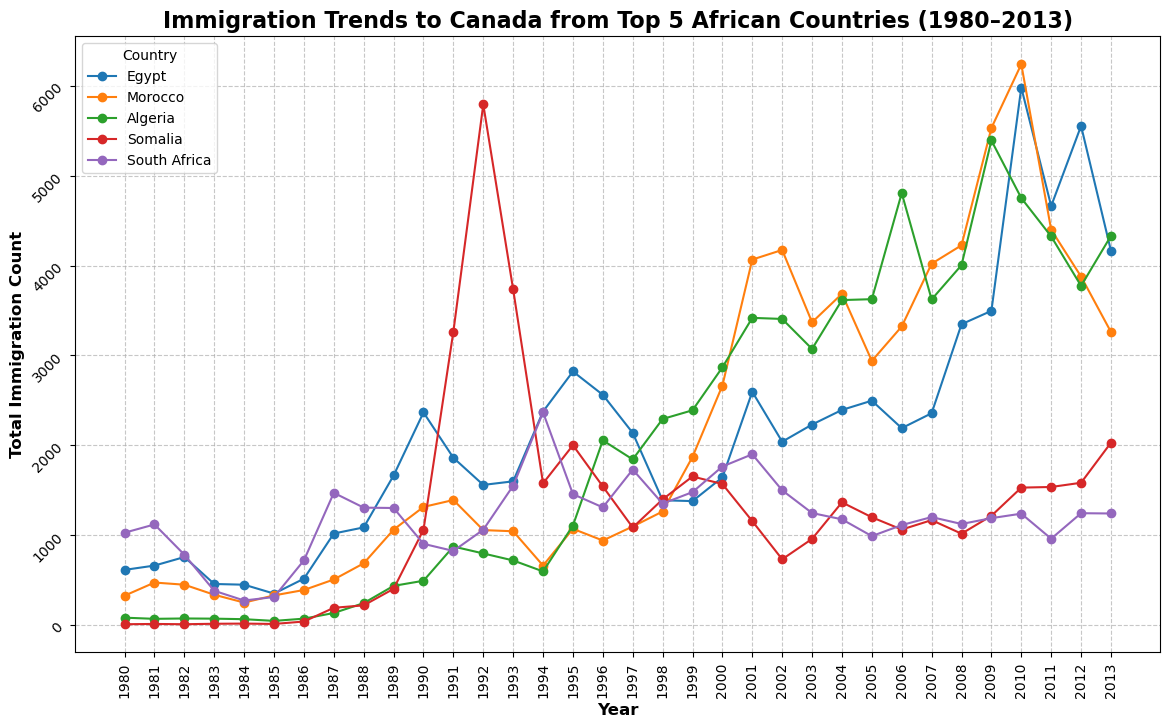

In [47]:
# Plotting trends over time for these top 5 African countries
plt.figure(figsize=(14, 8))
for country in top_3_african_countries.index:
    plt.plot(africa_data.loc[africa_data["Country"] == country, "1980":"2013"].columns,
             africa_data.loc[africa_data["Country"] == country, "1980":"2013"].values[0],
             label=country, marker='o')

plt.title("Immigration Trends to Canada from Top 5 African Countries (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.yticks(rotation = 45)
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Egypt, Morocco, and Algeria show a steady increase in immigration, particularly from the 1990s onward. This trend aligns with Canada’s evolving immigration policies that attract skilled workers from these populous and economically diverse nations.
Somalia displays a sharp spike around the early 1990s, likely reflecting political and humanitarian crises in the country, leading to increased refugee inflows to Canada.
South Africa maintains a relatively stable trend with moderate growth, indicative of established migration pathways.

### 7.2 North African Immigration Trends

Zooming in on North Africa, we analyze the immigration patterns specific to this region, identifying countries with notable immigration trends and comparing these over time. This analysis will help us understand the unique migration flows within North Africa, a region with strong historical and economic ties to Canada.

In [48]:
# Filtering data for North African countries and calculating total immigration
north_africa_data = df[df["Region"] == "Northern Africa"]
north_africa_totals = north_africa_data.groupby("Country",observed = True)["Total"].sum().sort_values(ascending=False)
north_africa_totals = north_africa_totals.drop(index = "Western Sahara")
north_africa_totals

Country
Egypt      72745
Morocco    72267
Algeria    69439
Sudan      18506
Tunisia    17583
Libya       4909
Name: Total, dtype: int64

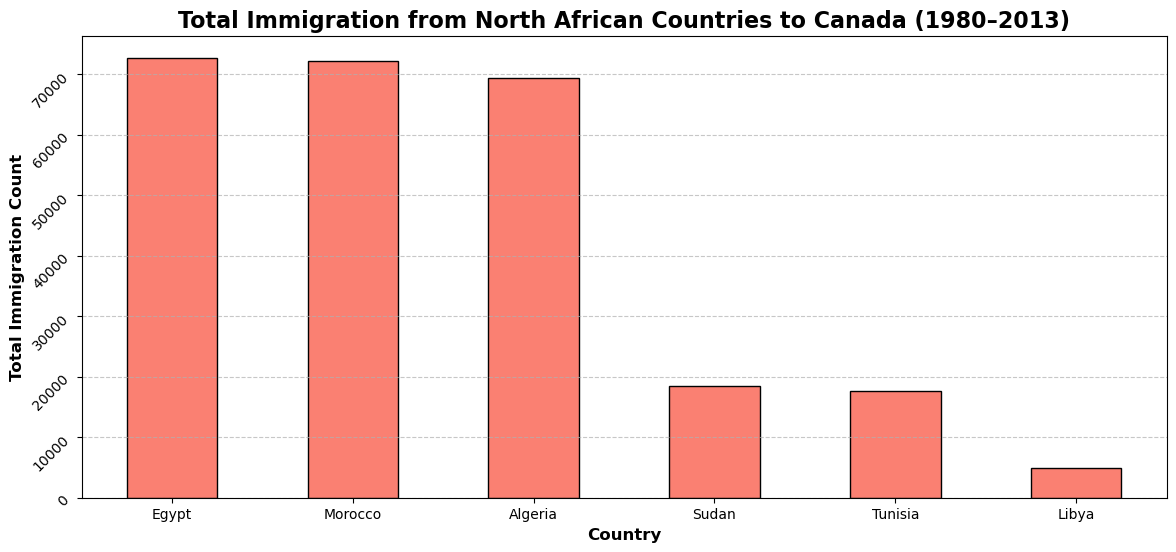

In [49]:
# Plotting a bar chart for total immigration from North African countries
plt.figure(figsize=(14, 6))
north_africa_totals.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Total Immigration from North African Countries to Canada (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In this bar chart, we see that Egypt, Morocco, and Algeria dominate North African immigration to Canada, each contributing over 70,000 immigrants, while Sudan and Tunisia have moderate contributions, and Libya remains relatively low. The prominence of Egypt, Morocco, and Algeria underlines strong migration ties with Canada, likely due to these countries’ larger populations and economic partnerships with Canada. The lower contributions from Sudan, Tunisia, and Libya reflect different migration dynamics, possibly affected by specific regional factors, smaller populations, or fewer established migration pathways.

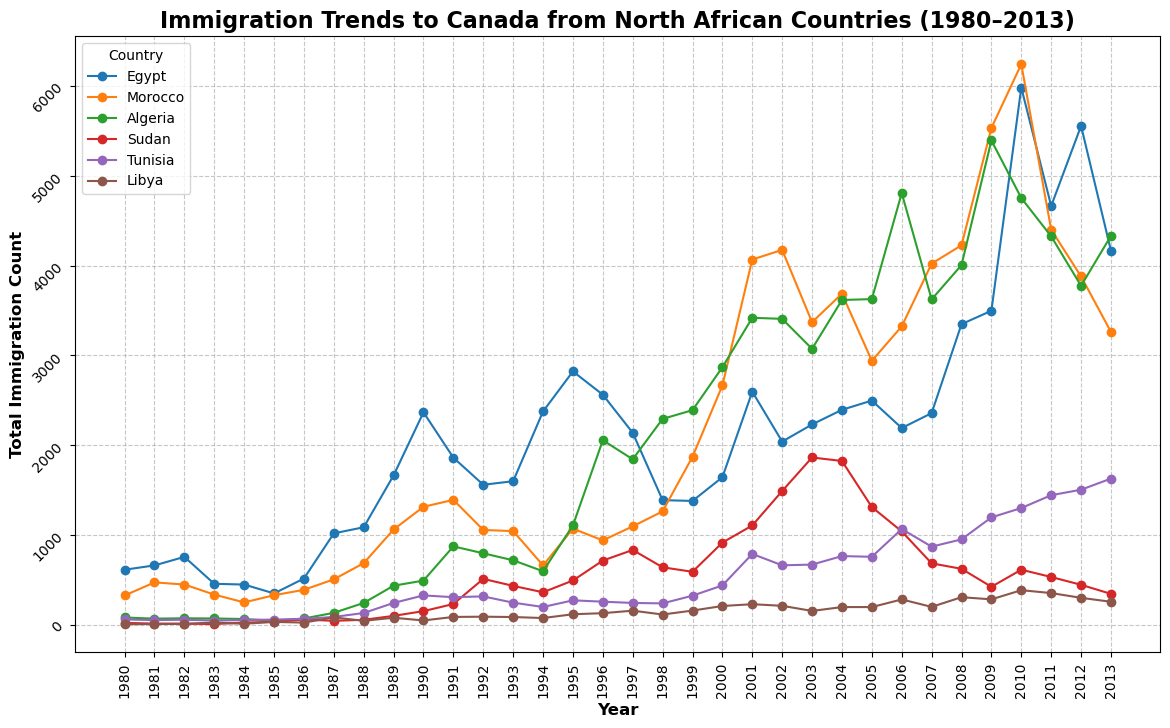

In [50]:
# Plotting a line chart to visualize trends over time for North African countries
plt.figure(figsize=(14, 8))
for country in north_africa_totals.index:
    plt.plot(north_africa_data.loc[north_africa_data["Country"] == country, "1980":"2013"].columns,
             north_africa_data.loc[north_africa_data["Country"] == country, "1980":"2013"].values[0],
             label=country, marker='o')

plt.title("Immigration Trends to Canada from North African Countries (1980–2013)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Total Immigration Count", fontsize=12, fontweight='bold')
plt.yticks(rotation = 45)
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Egypt, Morocco, and Algeria demonstrate consistent growth in immigration, with noticeable peaks in the early 2000s. This aligns with Canada's efforts to attract skilled immigrants and reflects increased interest in Canada as a migration destination.
Sudan and Tunisia show gradual, steady increases, indicating stable, albeit smaller, migration flows.
Libya remains at a low level with minimal variation, suggesting limited migration pathways or fewer socio-economic incentives for migration to Canada.

### 7.3 Summary

The in-depth analysis of immigration from Africa, with a particular focus on North Africa, highlights Canada’s dynamic approach to immigration. North African countries such as Egypt, Morocco, and Algeria have made significant contributions, reflecting deep-rooted migration connections supported by Canada’s immigration policies. In contrast, countries like Somalia have contributed largely due to humanitarian needs, while others, such as South Africa, maintain moderate, steady inflows. This analysis underscores the role of both economic partnerships and humanitarian responses in shaping Canada’s diverse African immigrant population, particularly from North African countries.

### 7.4 Special Focus on Morocco

In [51]:
# Filtering data for Morocco and plotting immigration trend over time
morocco_data = df[df["Country"] == "Morocco"]
morocco_data

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
116,Morocco,Africa,Northern Africa,Developing regions,325,471,447,335,248,328,...,2939,3322,4021,4226,5532,6242,4399,3878,3261,72267


Morocco stands out among North African countries as a consistent and significant source of immigration to Canada, with immigration numbers steadily increasing since the late 1980s. The trend reflects both Canada's targeted immigration policies and Morocco’s socio-economic conditions, which have motivated skilled professionals and families to seek opportunities abroad. The strong and growing Moroccan community in Canada likely provides additional support for new immigrants, creating a cycle that reinforces continued migration. Given the stable upward trend, we can anticipate further increases in Moroccan immigration in the future, particularly as Canada continues to focus on skilled immigration and Morocco’s younger population seeks international opportunities. This suggests that the Moroccan community in Canada is likely to expand further, enriching the cultural and economic fabric of Canadian society.

### 8 Conclusion 

This comprehensive analysis of immigration trends to Canada from 1980 to 2013 paints a vivid picture of Canada's strategic, adaptable, and inclusive approach to immigration. Over these decades, Canada has progressively increased its intake, reaching over 250,000 immigrants annually, with peaks in response to economic demand and favorable immigration policies. Initially, Europe was a primary contributor, but shifts in policy and global dynamics brought Asia to the forefront, making it the largest source of immigrants. Africa, South America, and the Caribbean have also shown steady growth, reflecting Canada’s focus on building a diverse immigrant base.

Through continent-level and region-level analyses, we identified key immigration sources such as Southern Asia, Eastern Asia, and Western Europe, while observing emerging contributions from Northern Africa and Eastern Europe. Canada’s balanced approach in attracting immigrants from both developed and developing regions aligns with its economic goals, with a notable increase in immigration from developing countries, particularly since the 1980s. This strategy underscores Canada’s commitment to fostering a multicultural society that draws on talent and diversity from around the world.

Countries like India and China lead Canada’s immigration landscape, highlighting a focus on skilled labor, while the UK’s consistent contribution reflects long-standing ties. In-depth analysis of African immigration, particularly from North Africa, showcases a nuanced balance between economic and humanitarian objectives, with Morocco standing out as a growing source. The Moroccan community’s steady expansion exemplifies Canada’s ongoing commitment to support diverse, economically motivated, and family-driven immigration pathways.

This project captures Canada’s dynamic immigration patterns, emphasizing an adaptive strategy that meets the country’s evolving economic, demographic, and multicultural objectives. Looking forward, Canada’s sustained openness to immigration from emerging markets and its stable ties with established economies suggest a future of continued growth and enriched diversity, further enhancing the cultural and economic fabric of Canadian society.